# PPD - projekt - 1

Zbiór danych o pacjentach badanych na chorobę tarczycy. 

## Wczytanie danych i zapoznanie się z nimi


Oryginalnie zbiór można znaleźć tutaj: https://archive.ics.uci.edu/ml/datasets/thyroid+disease

Zbiór ten zawiera rekordy z badaniami pacjentów zebrane w roku 1987. Targetem jest kolumna class, która określa czy dany pacjent ma chorobę tarczycy czy nie. Wszystkich kolumn jest 30 i wnoszą one informacje o danym pacjencie.

### Wczytanie zbioru

In [1]:
import numpy as np
import pandas as pd
from io import StringIO
import requests

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36'}
url = "https://datahub.io/machine-learning/sick/r/sick.csv"
s = requests.get(url, headers = headers).text
df = pd.read_csv(StringIO(s))

# Thyroid disease records supplied by the Garavan Institute and J. Ross Quinlan, New South Wales Institute, Syndney, Australia. 1987.

In [2]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative


### Atrybuty

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3622 non-null   object 
 2   on_thyroxine               3772 non-null   object 
 3   query_on_thyroxine         3772 non-null   object 
 4   on_antithyroid_medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid_surgery            3772 non-null   object 
 8   I131_treatment             3772 non-null   object 
 9   query_hypothyroid          3772 non-null   object 
 10  query_hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

In [4]:
np.unique(df.Class)

array(['negative', 'sick'], dtype=object)

Zbiór zawiera 29 atrybutów oraz target (kolumna Class), określający chorobę tarczycy lub jej brak u pacjenta. Typy kolumn to float bądź object. Można też zauważyć brakujące wartości.

Liczba rekordów nie jest duża (3772) a rozważamy dane medyczne, stąd nie będziemy chcieli usuwać zbytniej liczby rekordów.

### Charakterystyka zbioru

#### Sprawdzenie kolumn X z X_measured

In [5]:
print(all(np.array(df.TSH_measured=="f") == np.array(df.TSH.isna())))
print(all(np.array(df.T3_measured=="f") == np.array(df.T3.isna())))
print(all(np.array(df.TT4_measured=="f") == np.array(df.TT4.isna())))
print(all(np.array(df.T4U_measured=="f") == np.array(df.T4U.isna())))
print(all(np.array(df.FTI_measured=="f") == np.array(df.FTI.isna())))
print(all(np.array(df.TBG_measured=="f") == np.array(df.TBG.isna())))

True
True
True
True
True
True


Kolumny o nazwach kończących się "_measured" nie wnoszą dodatkowych informacji, bo "f" oznacza NA w odpowiadających im kolumnach. Jednak dla modelu tak opisana informacja może być bardziej znacząca niż sam pomiar. Dlaczego? Załóżmy, że dane badanie jest specjalistyczne i kosztowne - wówczas jeśli nie mamy podejrzeń do choroby u pacjenta to badanie nie zostanie wykonane, stąd informacja o braku pomiaru może sugerować zdrowego pacjenta.

#### Sprawdzenie wartości kolumn typu znakowego (kategoryczne, jakościowe)

In [6]:
df.iloc[:,2:16].columns

Index(['on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication',
       'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment',
       'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor',
       'hypopituitary', 'psych'],
      dtype='object')

In [7]:
np.unique(np.array(df.iloc[:,2:16]))

array(['f', 't'], dtype=object)

Kolumny 2:15 mają tylko informacje true/false.

In [8]:
np.unique(df.referral_source)

array(['STMW', 'SVHC', 'SVHD', 'SVI', 'other'], dtype=object)

In [9]:
df.sex.value_counts()

F    2480
M    1142
Name: sex, dtype: int64

In [10]:
3772-(2480+1142) # liczba braków danych w kolumie sex

150

Kolumna referral_source posiada 5 wartości, a zmienna odpowiadająca płci zawiera brakujące wartości. Można dodatkowo zauważyć, że zbiór posiada więcej kobiet niż mężczyzn. Więcej kobiet może wynikać z faktu iż w rzeczywistości to częściej kobiety chorują na tarczycę.

In [11]:
print(df.sick.value_counts())
print(df.Class.value_counts())

f    3625
t     147
Name: sick, dtype: int64
negative    3541
sick         231
Name: Class, dtype: int64


Kolumny sick i Class wzkazują inne dane, gdyż ich wartości się nie zgadzają. Wiemy, że target - Class - oznacza chorobę tarczycy lub jej brak, więc możemy zakładać, że sick określa jakieś możliwe przeziębienie pacjenta podczas badań.

#### Niezbalansowanie danych?

In [12]:
df.Class.value_counts(normalize = True)

negative    0.938759
sick        0.061241
Name: Class, dtype: float64

In [13]:
df.groupby("sex").Class.value_counts(normalize = True)

sex  Class   
F    negative    0.945161
     sick        0.054839
M    negative    0.922067
     sick        0.077933
Name: Class, dtype: float64

Liczba osób chorych (stosunek wartości w targecie) jest dość niska, więc dane nie są zbalansowane. Podział zdrowych i chorych osób między płeć jest natomiast podobny mimo różnic w liczbie rokordów.

#### Braki danych

In [14]:
NA_ratio_columns = df.isnull().mean()
NA_ratio_columns.round(4) * 100

age                            0.03
sex                            3.98
on_thyroxine                   0.00
query_on_thyroxine             0.00
on_antithyroid_medication      0.00
sick                           0.00
pregnant                       0.00
thyroid_surgery                0.00
I131_treatment                 0.00
query_hypothyroid              0.00
query_hyperthyroid             0.00
lithium                        0.00
goitre                         0.00
tumor                          0.00
hypopituitary                  0.00
psych                          0.00
TSH_measured                   0.00
TSH                            9.78
T3_measured                    0.00
T3                            20.39
TT4_measured                   0.00
TT4                            6.12
T4U_measured                   0.00
T4U                           10.26
FTI_measured                   0.00
FTI                           10.21
TBG_measured                   0.00
TBG                         

Jedna kolumna posiada same braki danych, reszta braków dotyczy zmierzonych wartości hormonów (TSH, T3, TT4 itd.) oraz płci.

### Charakterystyka odpowiadająca tej z SASa

#### Zmienne kategoryczne

Podsumowanie wartości w kolumnach w postaci liczbowej i procentowej:

In [68]:
object_columns = df.select_dtypes(include='object')
object_columns_names = object_columns.columns

for col in object_columns_names:
    print(col)
    tmp = pd.concat([object_columns[col].value_counts(dropna=False).to_frame(), object_columns[col].value_counts(normalize=True, dropna=False).to_frame()], axis=1)
    tmp.columns = ['Frequency Count', 'Percent of Total Frequency']
    print(tmp)
    print('______________________________________________________________')

sex
     Frequency Count  Percent of Total Frequency
F               2480                    0.657476
M               1142                    0.302757
NaN              150                    0.039767
______________________________________________________________
on_thyroxine
   Frequency Count  Percent of Total Frequency
f             3308                    0.876988
t              464                    0.123012
______________________________________________________________
query_on_thyroxine
   Frequency Count  Percent of Total Frequency
f             3722                    0.986744
t               50                    0.013256
______________________________________________________________
on_antithyroid_medication
   Frequency Count  Percent of Total Frequency
f             3729                      0.9886
t               43                      0.0114
______________________________________________________________
sick
   Frequency Count  Percent of Total Frequency
f             3

In [78]:
col = 'sex'
print("Zmienna:", col)
tmp = pd.concat([object_columns[col].value_counts(dropna=False).to_frame(), object_columns[col].value_counts(normalize=True, dropna=False).to_frame()], axis=1)
tmp.columns = ['Frequency Count', 'Percent of Total Frequency']
tmp

Zmienna: sex


,Frequency Count,Percent of Total Frequency
F,2480,0.657476
M,1142,0.302757
NaN,150,0.039767


Trzeba przyznać, że wykonanie tabeli tego typu w SASie jest dużo wygodniejsze - tutaj należy zrobić to ręcznie, a żeby otrzymać taki sam wydruk to trzeba się trochę napracować, mimo to osiągnięty rezultat nie jest tak ładny jak w SAS.

#### Zmienne numeryczne

Podstawowe statystyki dla zmiennych: 

In [16]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3771.000000,3403.000000,3003.000000,3541.000000,3385.000000,3387.000000,0.0
mean,51.735879,5.086766,2.013500,108.319345,0.995000,110.469649,NaN
std,20.084958,24.521470,0.827434,35.604248,0.195457,33.089698,NaN
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000,NaN
25%,36.000000,0.500000,1.600000,88.000000,0.880000,93.000000,NaN
50%,54.000000,1.400000,2.000000,103.000000,0.980000,107.000000,NaN
75%,67.000000,2.700000,2.400000,124.000000,1.080000,124.000000,NaN
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000,NaN


Zmienna age posiada nietypową wartość!

In [17]:
df[df['age']<455].describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3770.000000,3401.000000,3001.000000,3539.000000,3383.000000,3385.000000,0.0
mean,51.628912,5.089258,2.013675,108.313309,0.995012,110.461064,NaN
std,18.982990,24.528465,0.827657,35.613396,0.195478,33.093651,NaN
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000,NaN
25%,36.000000,0.500000,1.600000,87.500000,0.880000,93.000000,NaN
50%,54.000000,1.400000,2.000000,103.000000,0.980000,107.000000,NaN
75%,67.000000,2.700000,2.400000,124.000000,1.080000,124.000000,NaN
max,94.000000,530.000000,10.600000,430.000000,2.320000,395.000000,NaN


W SAS mamy dodatkowo informację o std_mean, total (suma) raz nmiss (ile jest brakujących wartości). Natomiast nie ma tam kwantyli (wiersze 25\% i 75\%). Tak jak w naszym przypadku suma ani odchylenie standardowe średniej nie jest potrzebne tak dobrze mieć też wartość danych brakujących. Liczyliśmy to ręcznie w poprzedniej sekcji.

Procent brakujących wartości w kolumnach, które te braki posiadają:

In [18]:
NA_ratio_numcolumns = df.select_dtypes(include='float64').isnull().mean()
NA_ratio_numcolumns.round(4) * 100

age      0.03
TSH      9.78
T3      20.39
TT4      6.12
T4U     10.26
FTI     10.21
TBG    100.00
dtype: float64

#### Wykresy 

Charakterystyka w SASie pokazuje również liczebność wartości z atrybutów na wykresach. Stąd poniżej odtworzono te wykresy dla zmiennych kategorycznych, natomiast dla zmiennych numerycznych narysowano wykres przyjmowanych wartości.

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

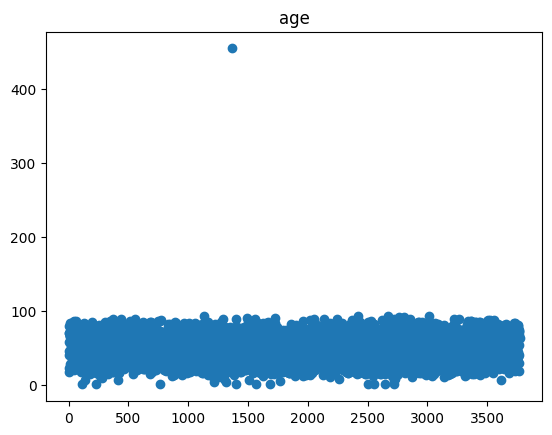

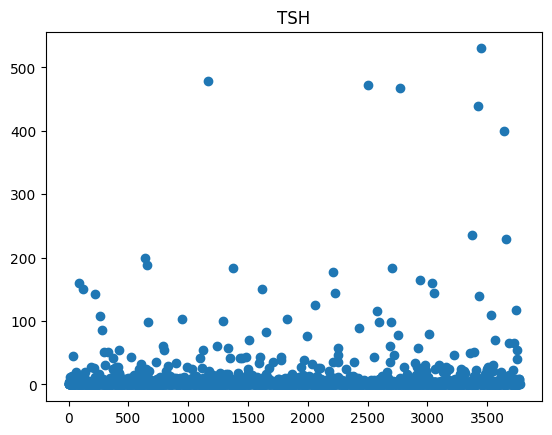

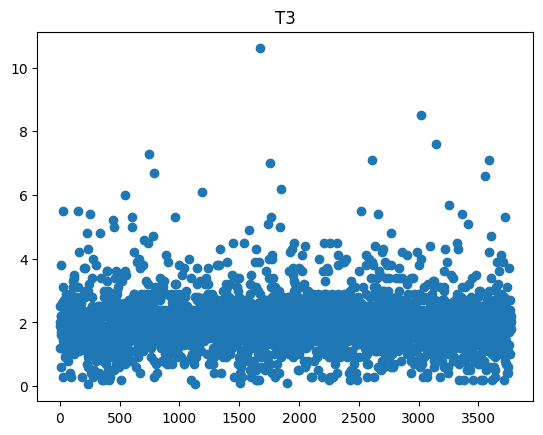

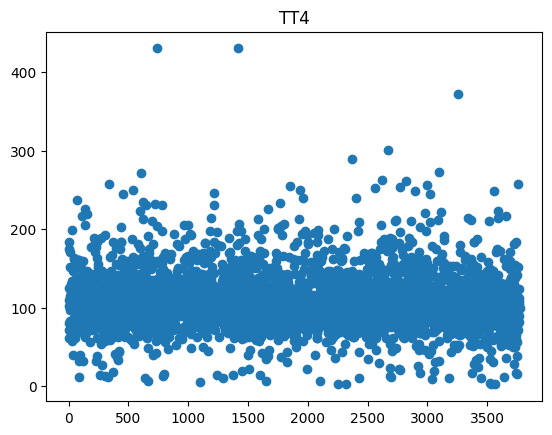

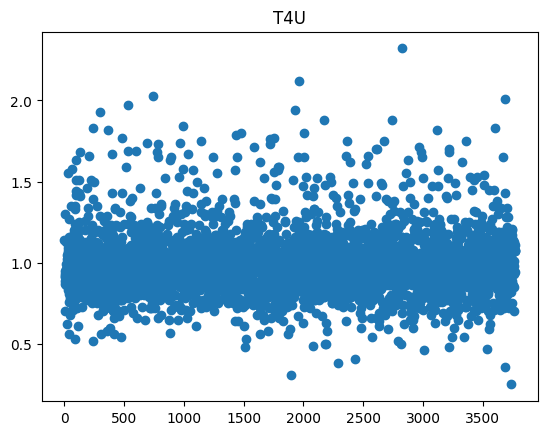

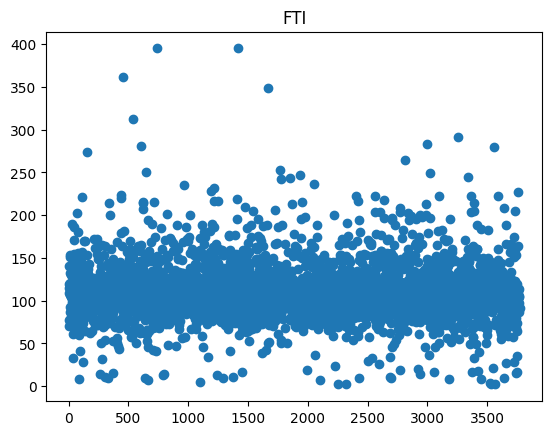

In [20]:
num_columns_names = df.drop('TBG', axis=1).select_dtypes(include='float64').columns

for col in num_columns_names:
    plt.plot(df[col], 'o')
    plt.title(col)
    plt.show()

Sprawdzenie wartości odstającej (niemożliwej wręcz do osiągnięcia) dla kolumny age (wieku).

In [21]:
df[df.age == 455]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
1364,455.0,F,f,f,f,f,f,f,f,f,...,t,118.0,t,1.13,t,104.0,f,NaN,SVI,negative


Prawdopodobnie jest to pomyłka przy wpisywaniu wieku - może być to wartość 45 bądź 55. Nie jesteśmy w stanie tego stwierdzić, więc najlepiej będzie usunąć tę wartość.

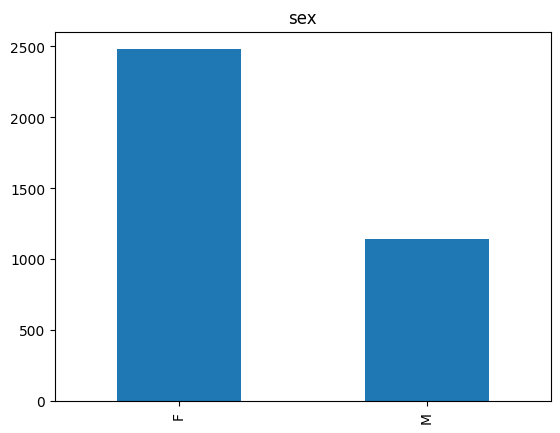

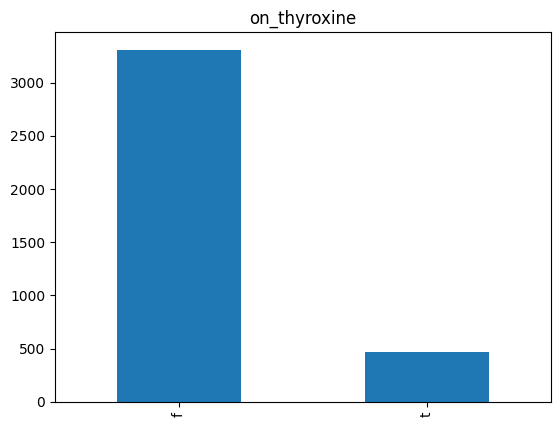

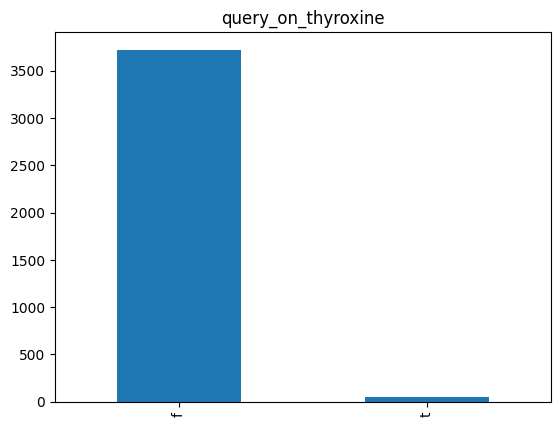

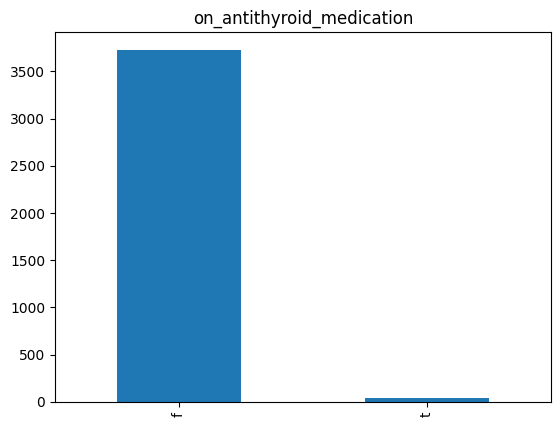

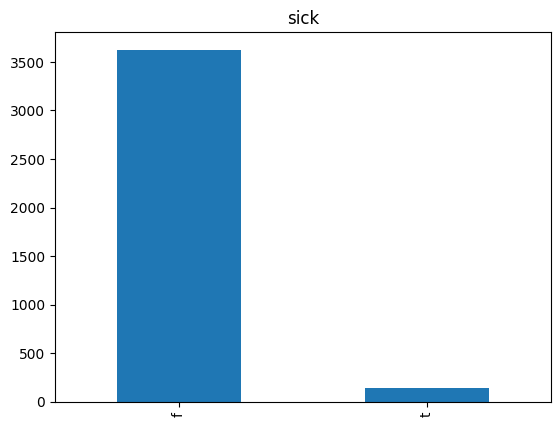

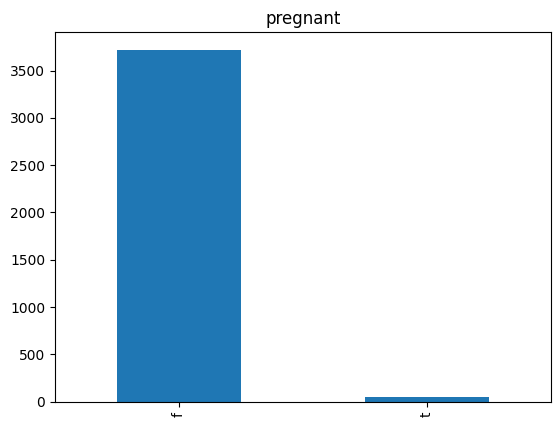

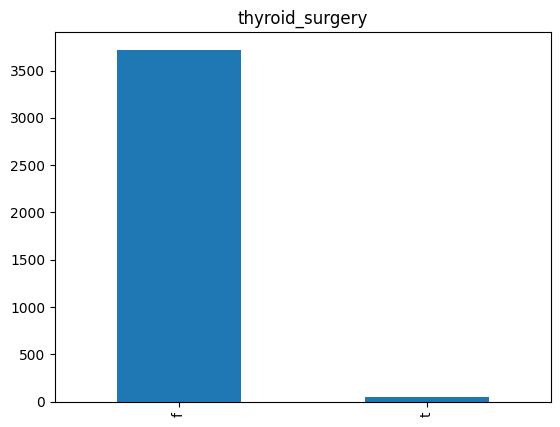

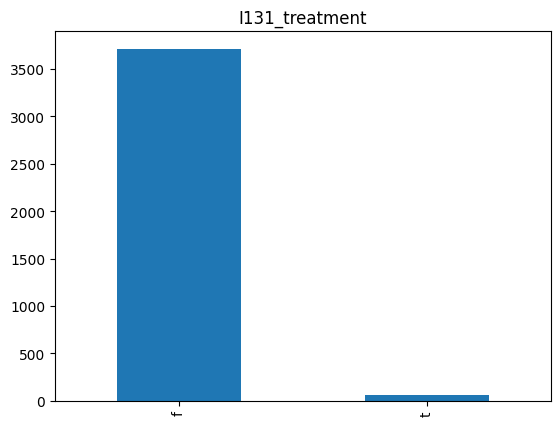

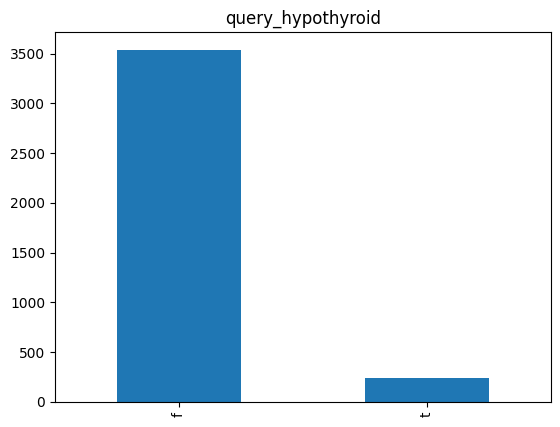

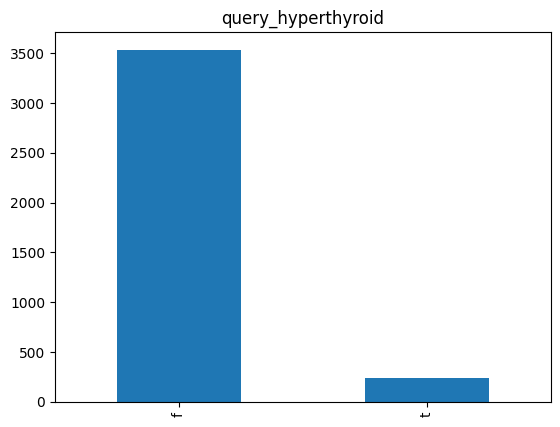

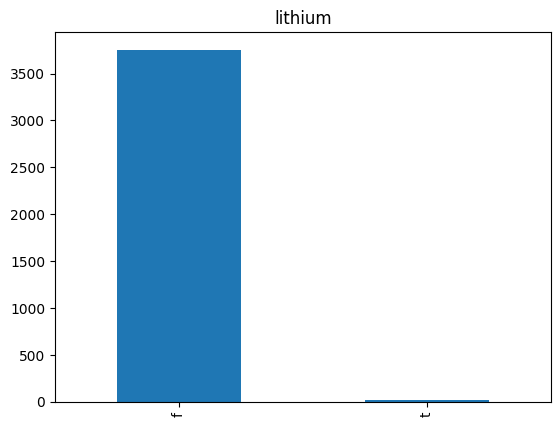

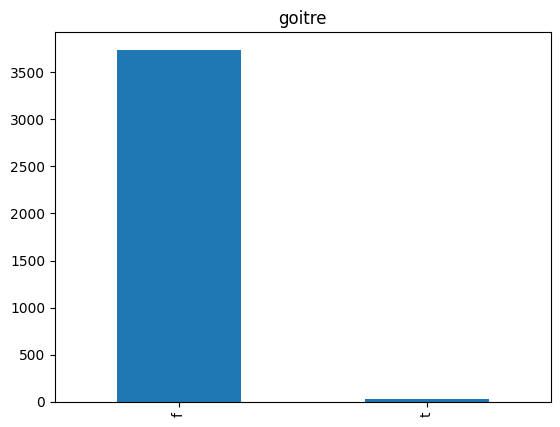

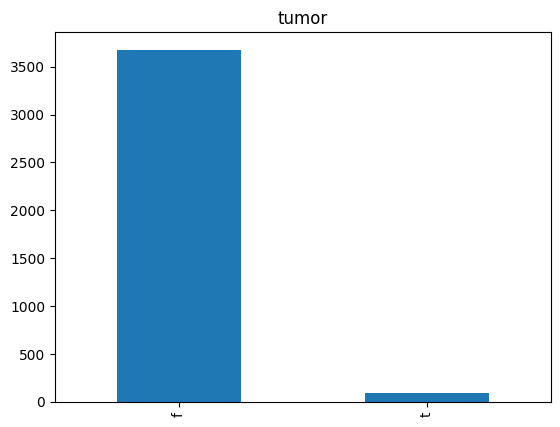

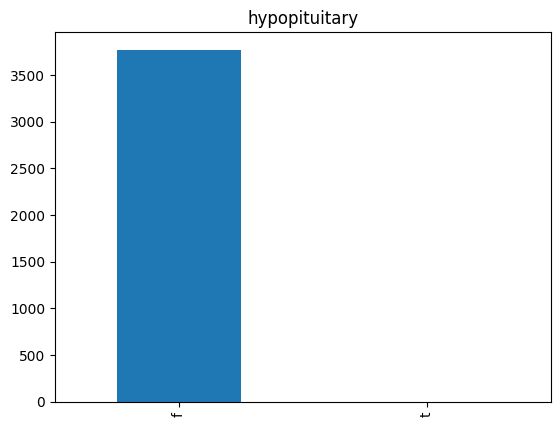

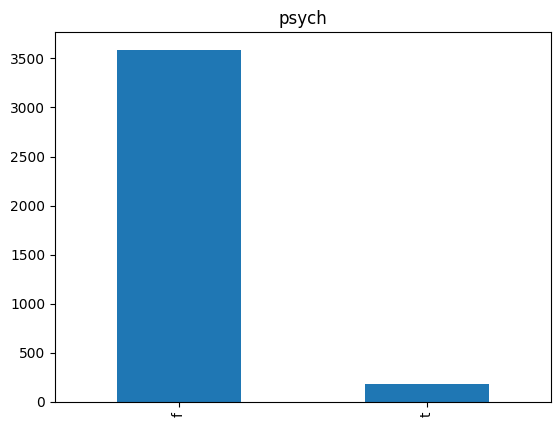

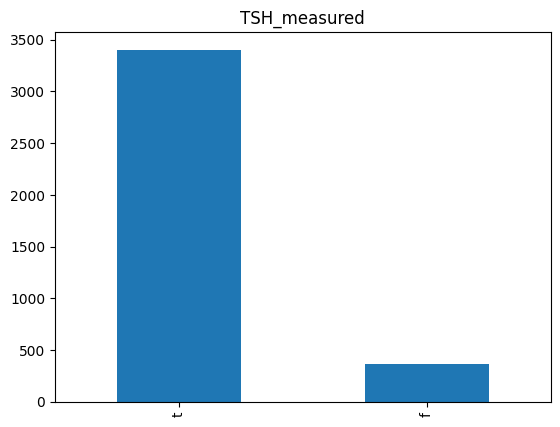

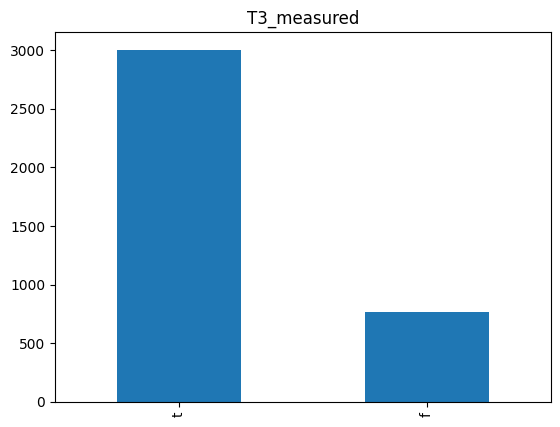

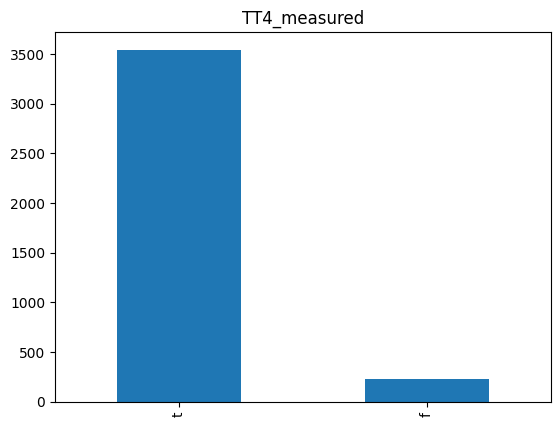

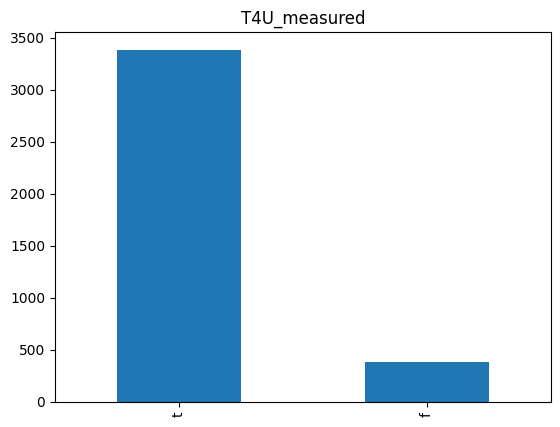

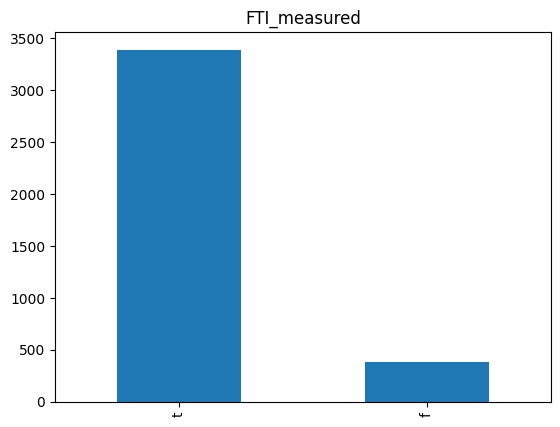

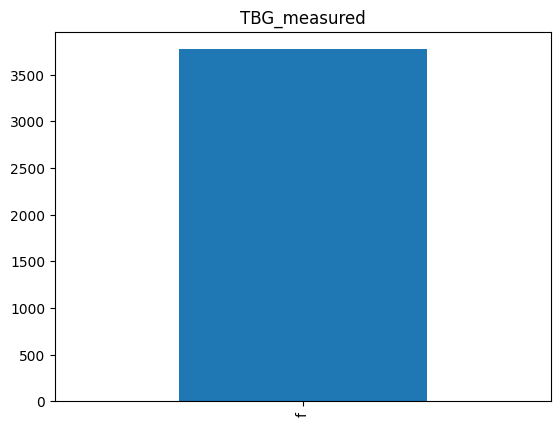

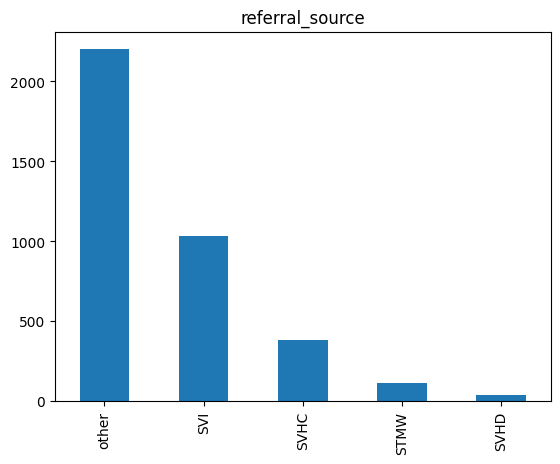

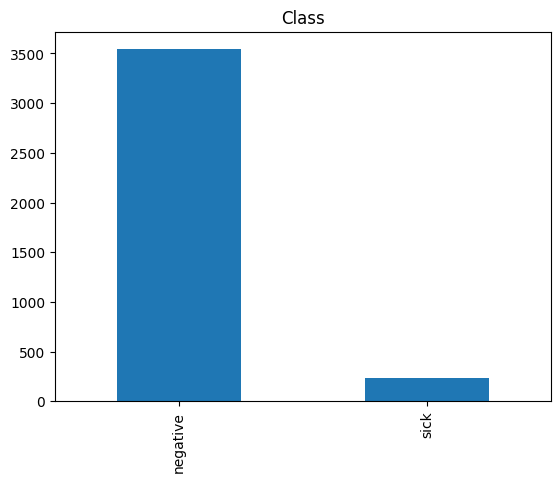

In [22]:
for col in object_columns_names:
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

### EDA

Na wstępie usuniemy kolumnę, która jest cała pusta, bo nie przyniesie nam żadnych wartości, a chcemy ułatwić sobie EDA.

In [23]:
data = df.drop('TBG', axis=1) # wciąż posiadamy kolumne mówiącą o tym czy zmierzono TBG
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,2.5,t,125.0,t,1.14,t,109.0,f,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,2.0,t,102.0,f,NaN,f,NaN,f,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,NaN,t,109.0,t,0.91,t,120.0,f,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,1.9,t,175.0,f,NaN,f,NaN,f,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,1.2,t,61.0,t,0.87,t,70.0,f,SVI,negative


#### Rozkłady zmiennych numerycznych

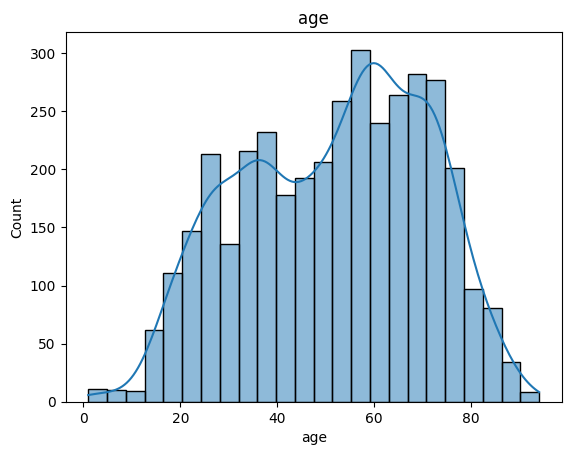

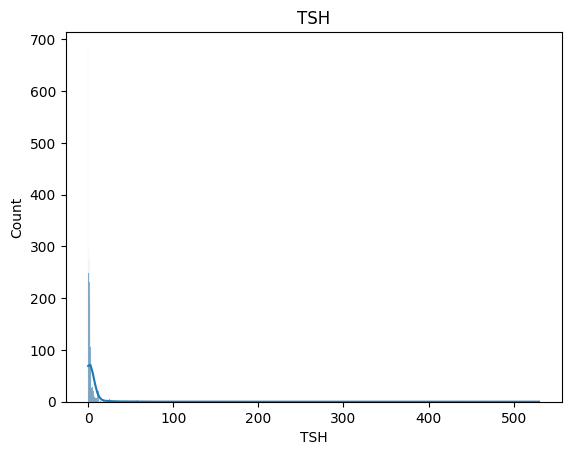

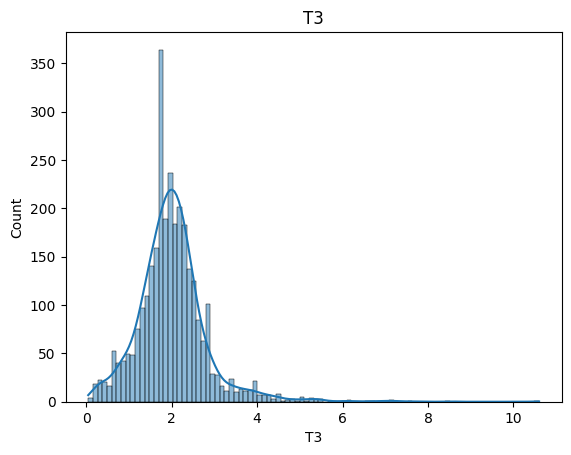

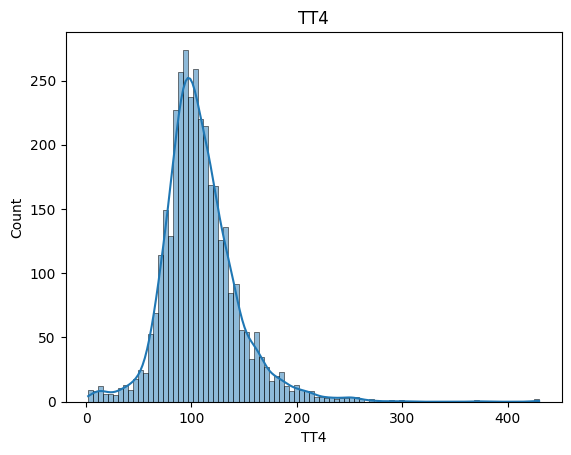

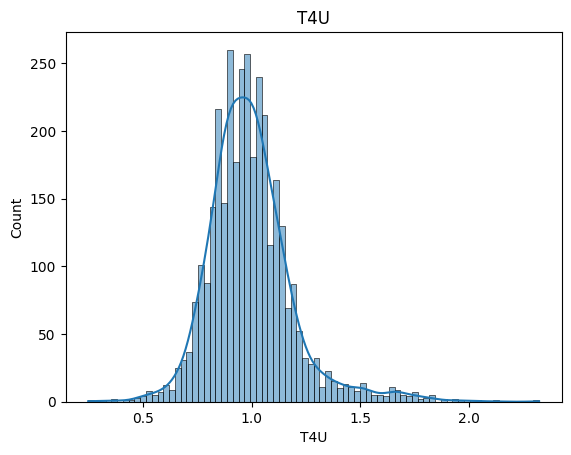

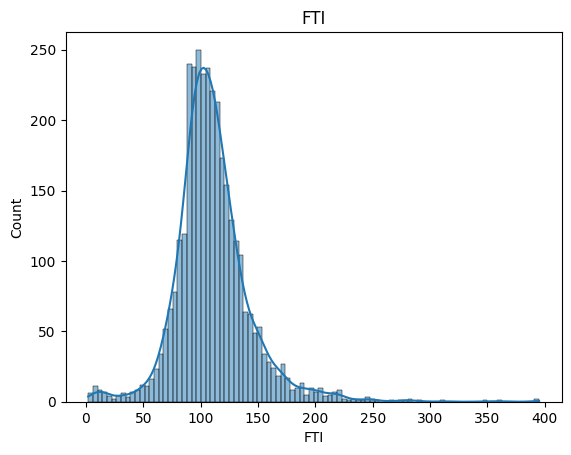

In [24]:
for col in num_columns_names:
    col_plot = sns.histplot(df[df['age']<455][col], kde=True)
    col_plot.set_title(col)
    plt.show()

Wykres dla TSH nie jest czytelny, dlatego poniżej wykonano go w inny sposób:

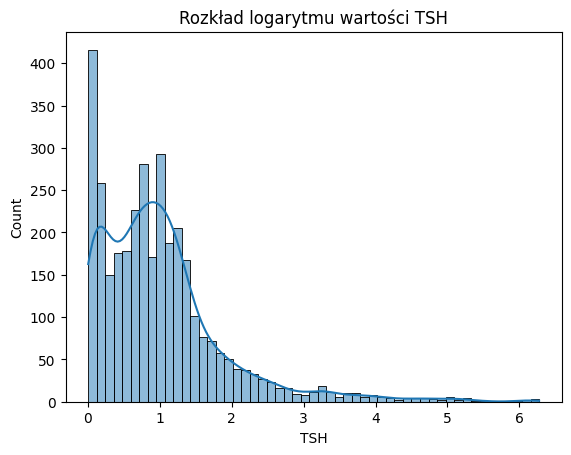

In [25]:
TSH_log = np.log1p(df.TSH)
TSH_log = TSH_log[~np.isnan(TSH_log)]
tsh_log_plt = sns.histplot(TSH_log, kde=True)
tsh_log_plt.set_title("Rozkład logarytmu wartości TSH")
plt.show()

Poniżej sprawdzono jeszcze rozkład z podziałem na płeć:

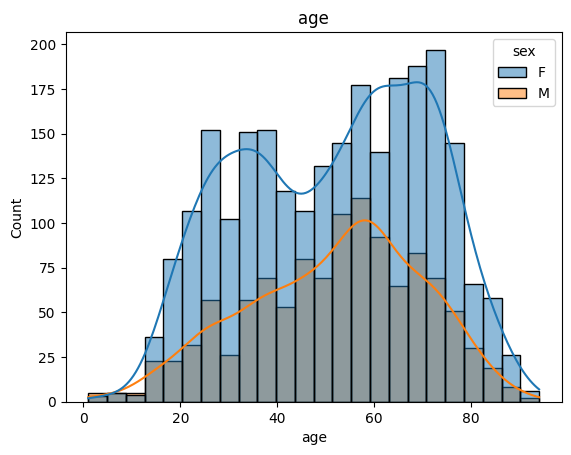

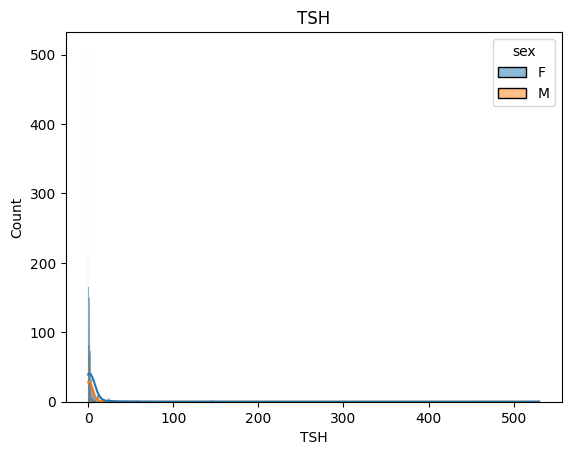

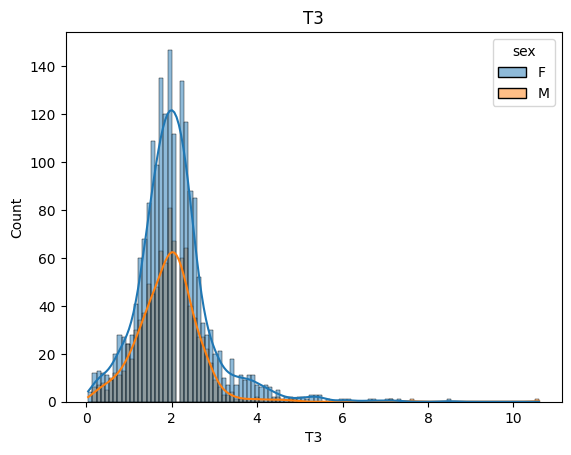

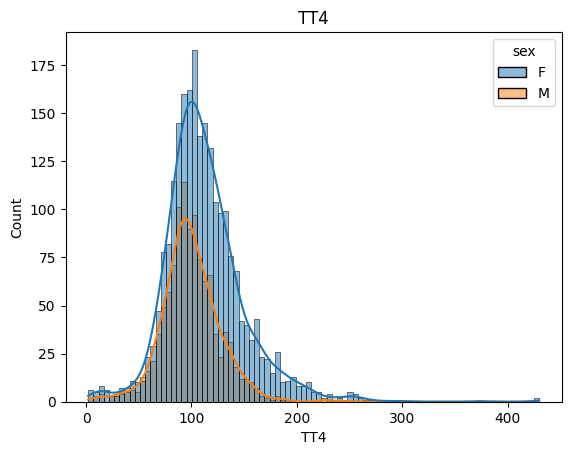

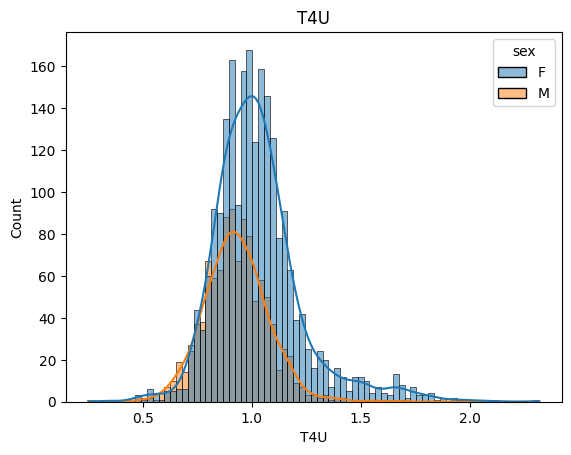

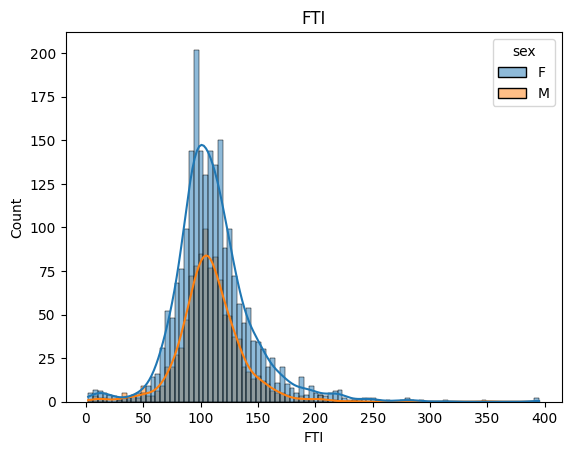

In [72]:
for col in num_columns_names:
    col_plot = sns.histplot(df[df['age']<455], x=col, hue='sex', kde=True)
    col_plot.set_title(col)
    plt.show()

TT4, T4U i wiek mają inne rozkłady w zależności od płci. Mamy więcej kobiet w zbiorze, zakładając, że one chorują częściej wyjaśniałoby to czemu te wartości są przesunięte na wyższe w przypadku hormonów. Jeśli chodzi o wiek to może być to spowodowane tym, że kobiety badają się częściej wiedząc, że mogą zachorować, więc robią to w wieku 25-35 lat, aby sprawdzić stan zdrowia, bo może w rodzinie występowało coś podobnego itp. 

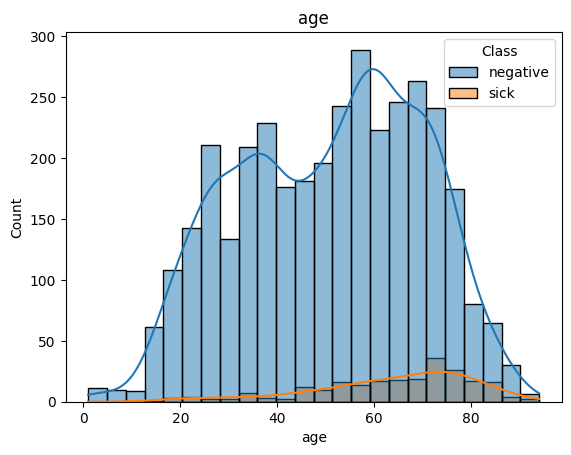

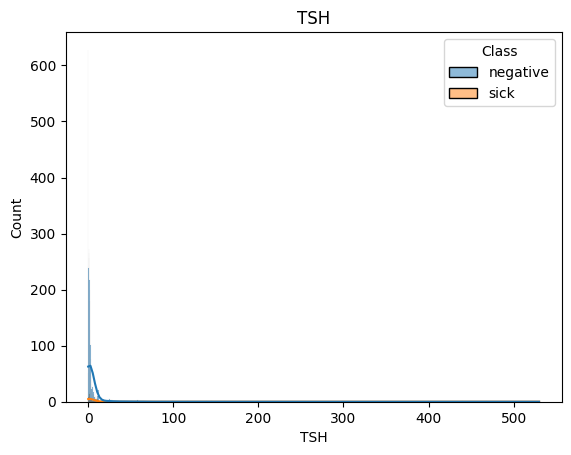

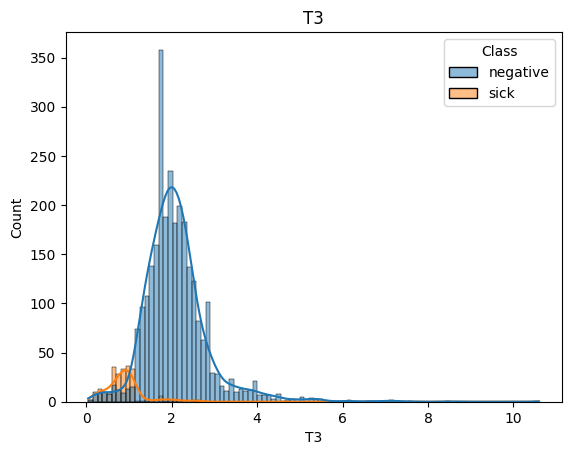

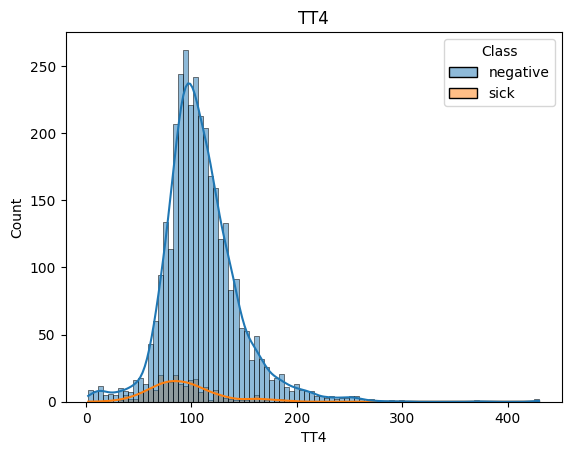

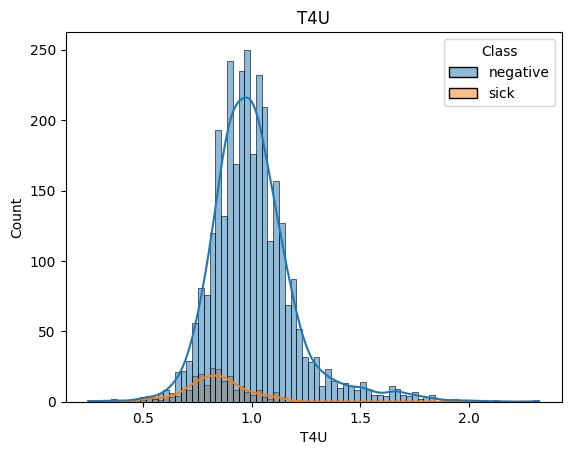

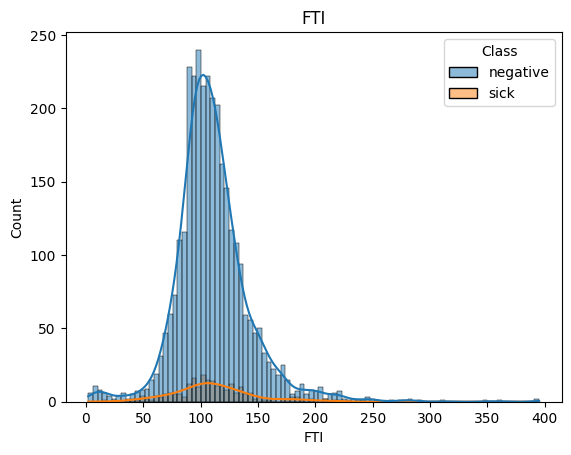

In [79]:
for col in num_columns_names:
    col_plot = sns.histplot(df[df['age']<455], x=col, hue='Class', kde=True)
    col_plot.set_title(col)
    plt.show()

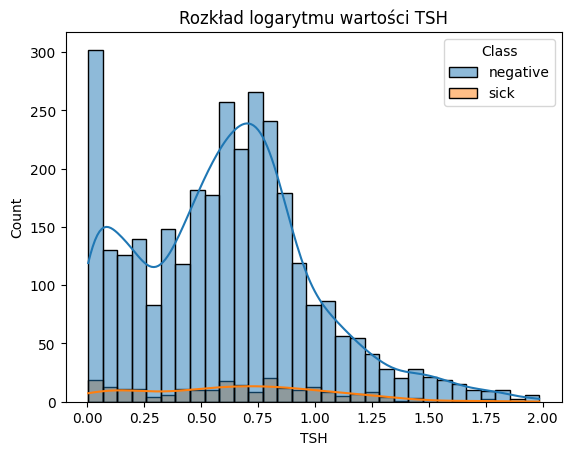

In [81]:
tmp = df
tmp.TSH = np.log1p(tmp.TSH)
tmp.TSH = tmp.TSH[~np.isnan(tmp.TSH)]
tsh_log_plt = sns.histplot(tmp, x='TSH', hue='Class', kde=True)
tsh_log_plt.set_title("Rozkład logarytmu wartości TSH")
plt.show()

#### Charakterystyka danych dla zmiennych kategorycznych z podziałem na zmienną celu

In [26]:
round(data[data.Class == 'sick'].sex.value_counts(normalize = True, dropna=False)*100, 2)

F      58.87
M      38.53
NaN     2.60
Name: sex, dtype: float64

Procent wartości zmiennej. Mamy 2.6% braków danych.

In [27]:
for col in object_columns_names[:-1]:
    print('\nFrequency Count\n')
    print(data.groupby(['Class'])[col].value_counts(dropna=False))
    print('______________________________________________________________')


Frequency Count

Class     sex
negative  F      2344
          M      1053
          NaN     144
sick      F       136
          M        89
          NaN       6
Name: sex, dtype: int64
______________________________________________________________

Frequency Count

Class     on_thyroxine
negative  f               3089
          t                452
sick      f                219
          t                 12
Name: on_thyroxine, dtype: int64
______________________________________________________________

Frequency Count

Class     query_on_thyroxine
negative  f                     3495
          t                       46
sick      f                      227
          t                        4
Name: query_on_thyroxine, dtype: int64
______________________________________________________________

Frequency Count

Class     on_antithyroid_medication
negative  f                            3498
          t                              43
sick      f                             231
Name:

Ciekawe informacje:
- osoby chore nie mają wartości true dla kolumny on_antithyroid_medication, czyli nie są na lekach przewictarczycowych
- brakuje osób w ciąży w zbiorze
- osoby chore nie miały też operacji tarczycy
- tylko 2 osoby mają powiększony gruczoł tarczycy spośród chorych
- tylko 2 osoby mają guza spośród chorych
- TT4 zmierzono wszystkim chorym

#### Statystyki agregujące ze względu na zmienną celu (zmienne numeryczne)

In [28]:
# data.groupby('Class').describe()- nieczytelne
data[data.Class == 'sick'].describe()

,age,TSH,T3,TT4,T4U,FTI
count,231.000000,229.000000,228.000000,231.000000,223.000000,223.000000
mean,63.922078,4.262009,0.892325,92.588745,0.835112,110.910314
std,16.314384,13.201192,0.440560,31.380826,0.135217,34.268298
min,16.000000,0.005000,0.050000,19.000000,0.460000,17.000000
25%,55.000000,0.430000,0.700000,72.000000,0.750000,93.000000
50%,68.000000,1.500000,0.900000,87.000000,0.830000,108.000000
75%,76.000000,3.600000,1.000000,106.000000,0.910000,127.000000
max,93.000000,143.000000,2.600000,192.000000,1.140000,219.000000


In [29]:
data[data.Class != 'sick'].describe()

,age,TSH,T3,TT4,T4U,FTI
count,3540.000000,3174.000000,2775.000000,3310.000000,3162.000000,3164.000000
mean,50.940678,5.146271,2.105618,109.417160,1.006276,110.438590
std,20.052767,25.142081,0.783090,35.626248,0.194124,33.010417
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000
25%,35.000000,0.500000,1.700000,89.000000,0.890000,93.000000
50%,53.000000,1.400000,2.000000,105.000000,0.990000,107.000000
75%,66.000000,2.600000,2.400000,125.000000,1.090000,124.000000
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000


Poniższy sposób sprawia, że nie wiadomo jaka kolumna jest właśnie pokazywana.

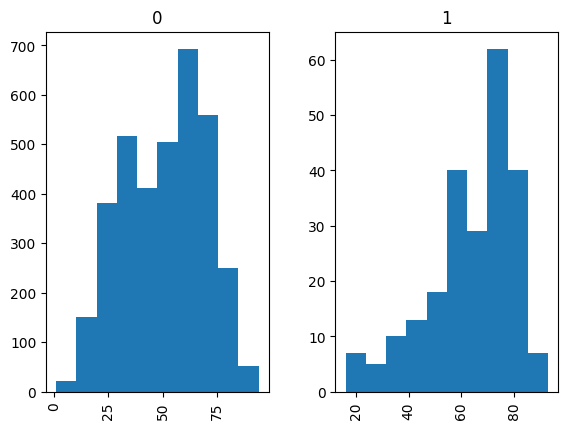

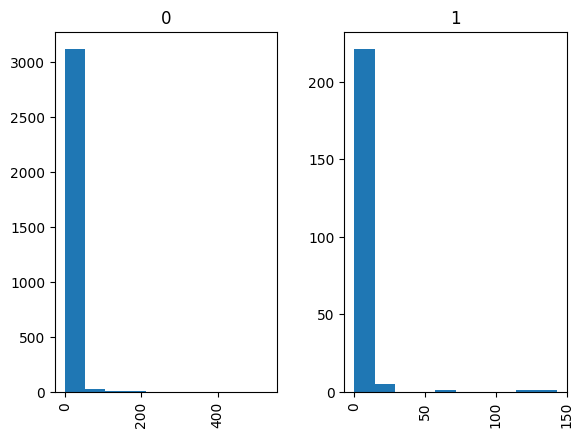

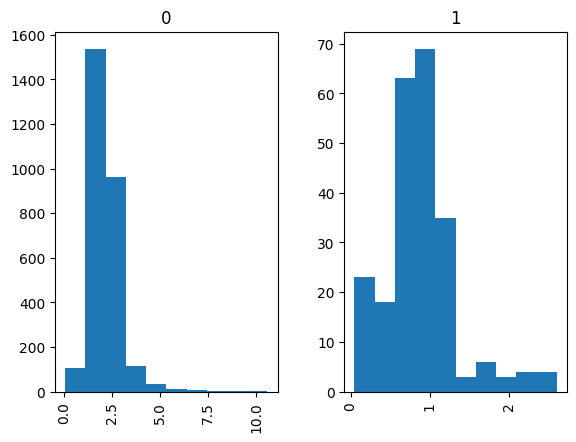

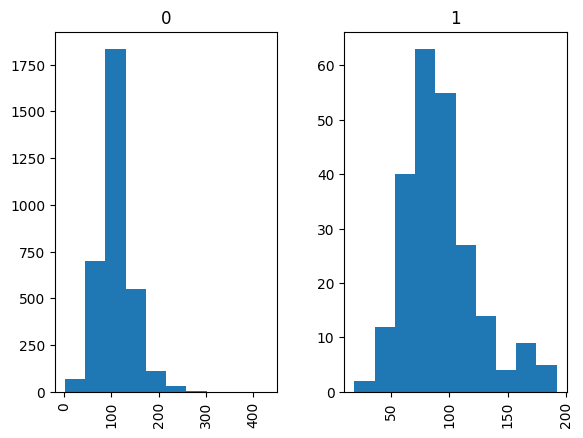

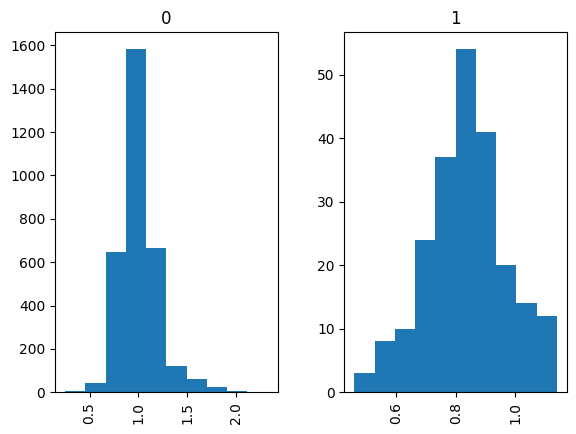

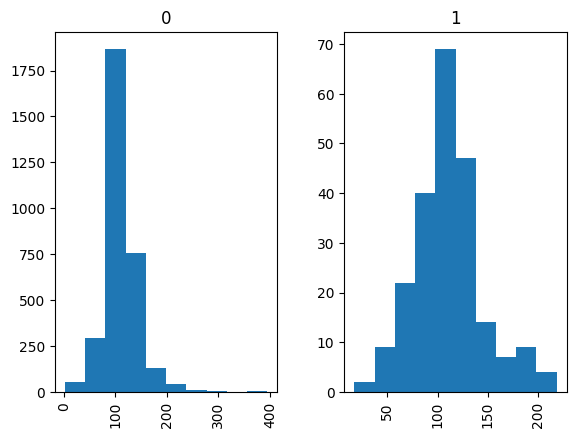

In [74]:
for col in num_columns_names:
    data[data['age']<455][col].hist(by=data['Class'])

In [31]:
num_columns_names

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'], dtype='object')

Stąd lepsze są takie wykresy:

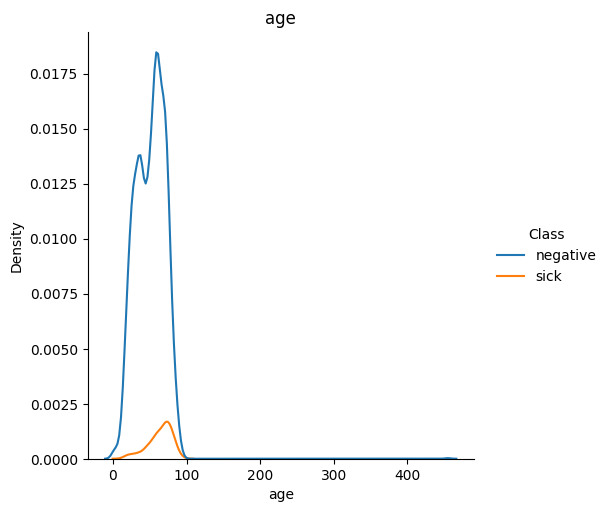

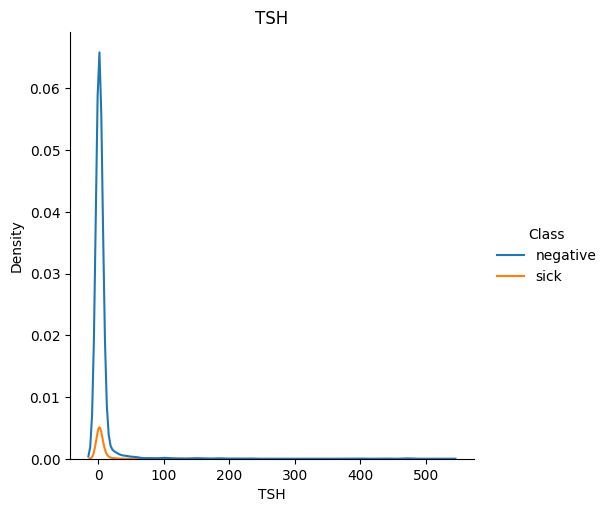

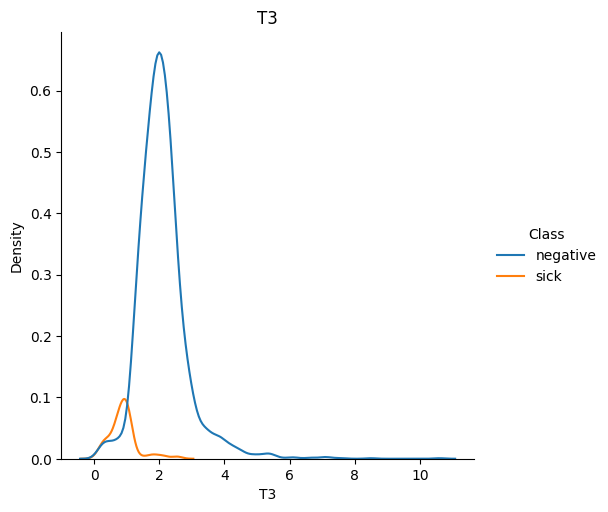

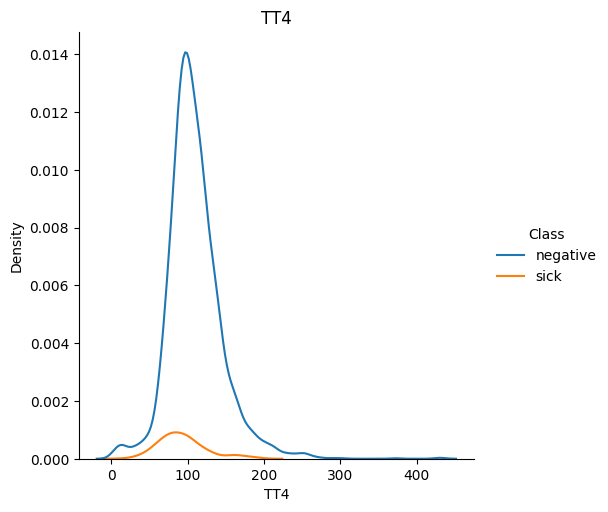

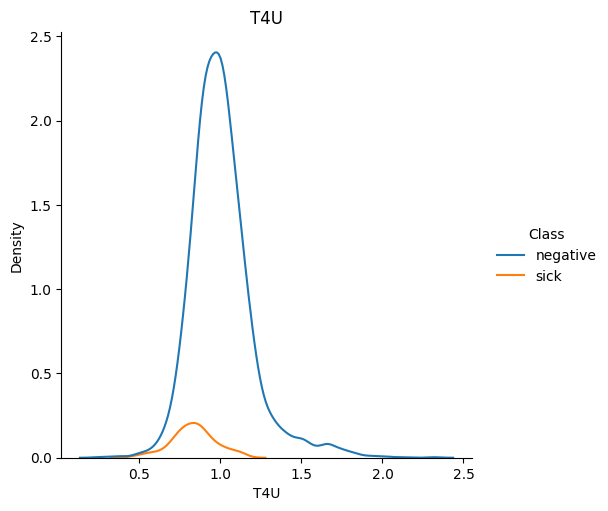

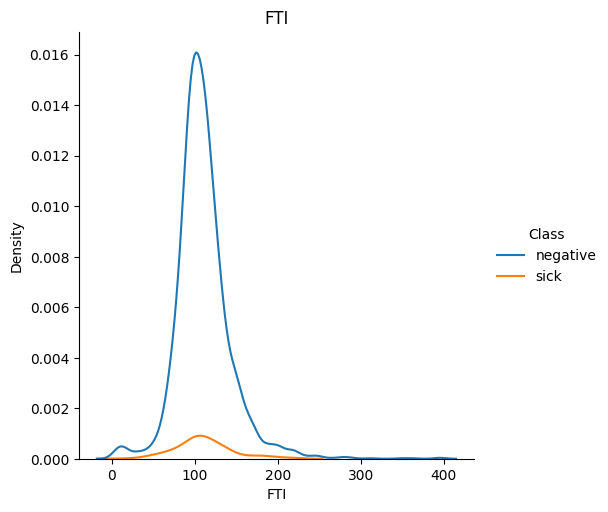

In [32]:
for col in num_columns_names:
    sns.displot(data, x=col, hue='Class', kind='kde')
    plt.title(col)
    plt.show()

Widać różnicę rozkładów w zależności od tego czy są chorzy bądź zdrowi, więc zmienne numeryczne mogą okazać się bardzo wartościowe dla predykcji.

#### Statystyki agregujące ze względu na płeć i zmienną celu

In [33]:
for col in object_columns_names[2:-1]:
    print('\nFrequency Count\n')
    print(data.groupby(['sex', 'Class'])[col].value_counts(dropna=False))
    print('______________________________________________________________')


Frequency Count

sex  Class     query_on_thyroxine
F    negative  f                     2320
               t                       24
     sick      f                      135
               t                        1
M    negative  f                     1032
               t                       21
     sick      f                       86
               t                        3
Name: query_on_thyroxine, dtype: int64
______________________________________________________________

Frequency Count

sex  Class     on_antithyroid_medication
F    negative  f                            2309
               t                              35
     sick      f                             136
M    negative  f                            1045
               t                               8
     sick      f                              89
Name: on_antithyroid_medication, dtype: int64
______________________________________________________________

Frequency Count

sex  Class     sick
F    negat

Z podziałem na płeć:

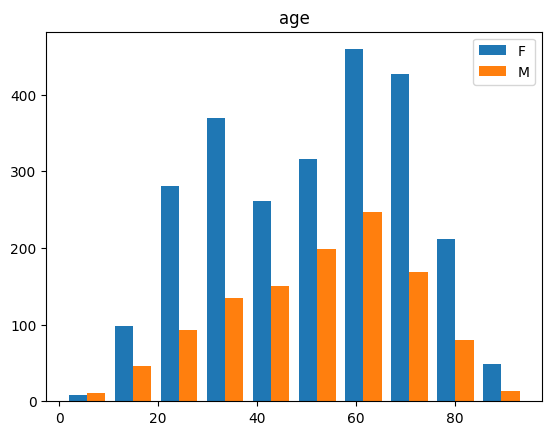

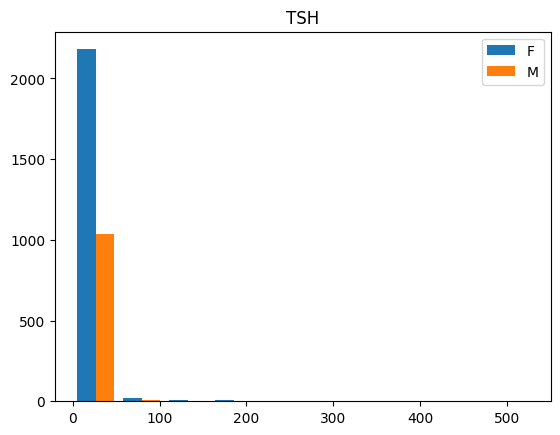

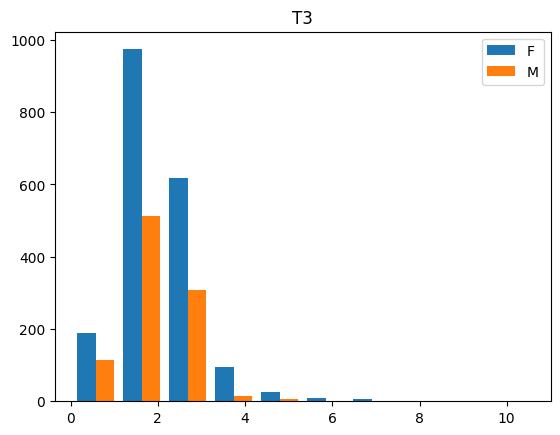

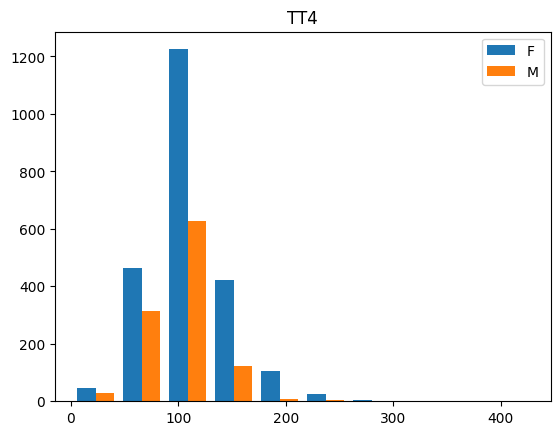

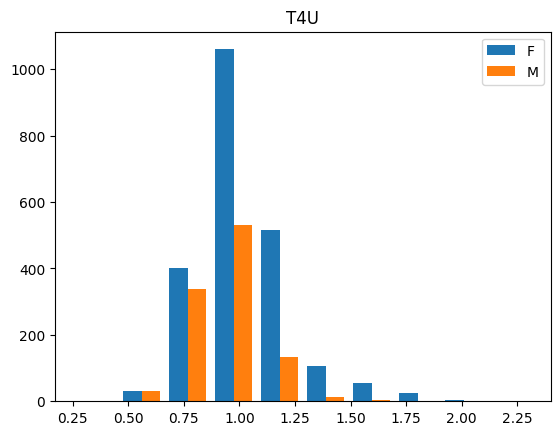

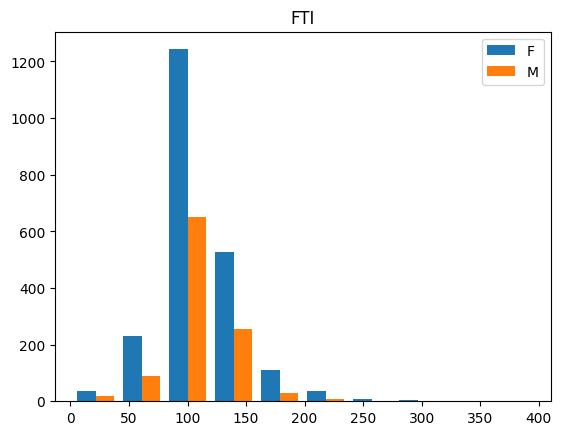

In [34]:
data2 = data[data.age<455]
female = data2[data2.sex=="F"]
male = data2[data2.sex=="M"]

for col in num_columns_names:
    plt.hist([female[col], male[col]])
    plt.title(col)
    plt.legend(['F', 'M'])
    plt.show()

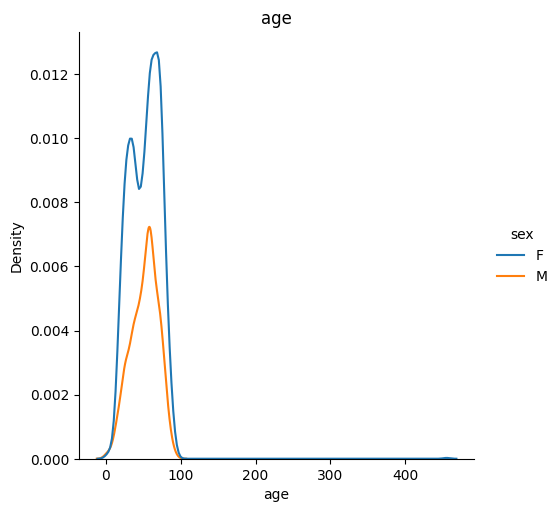

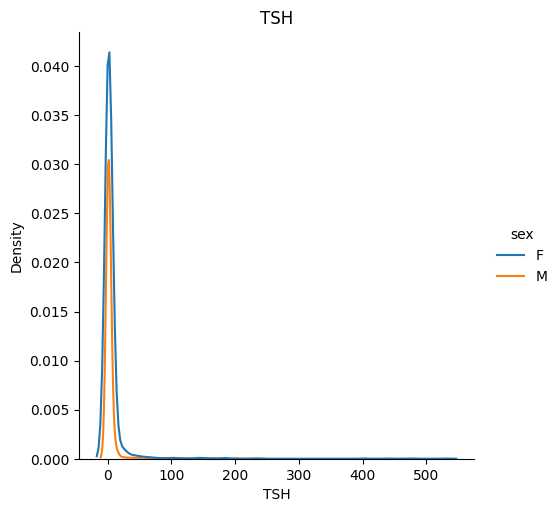

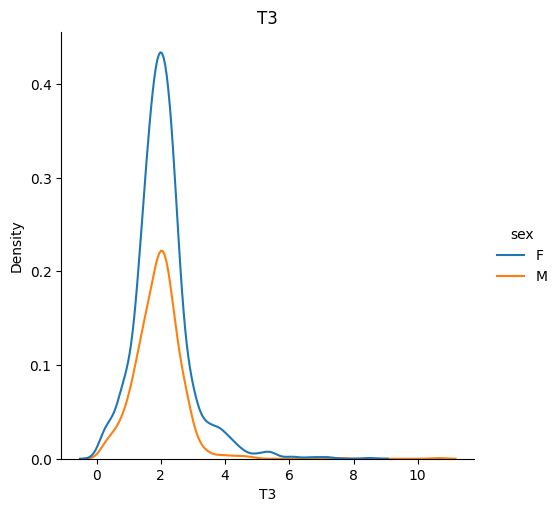

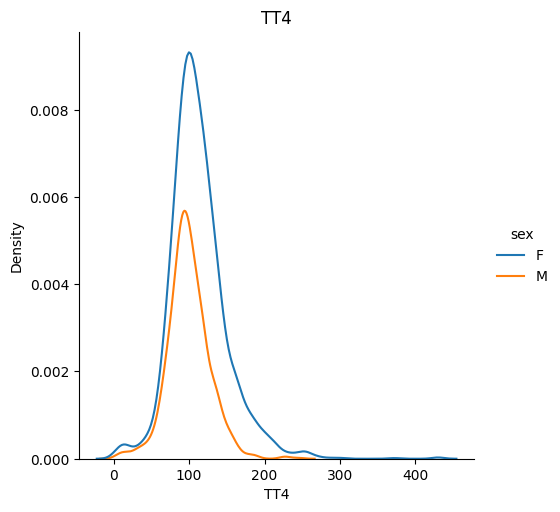

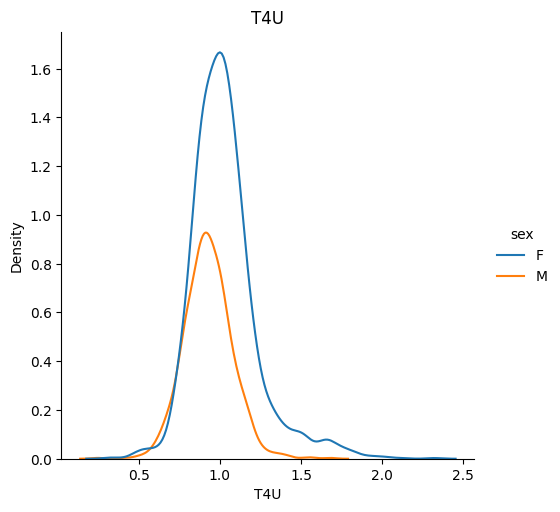

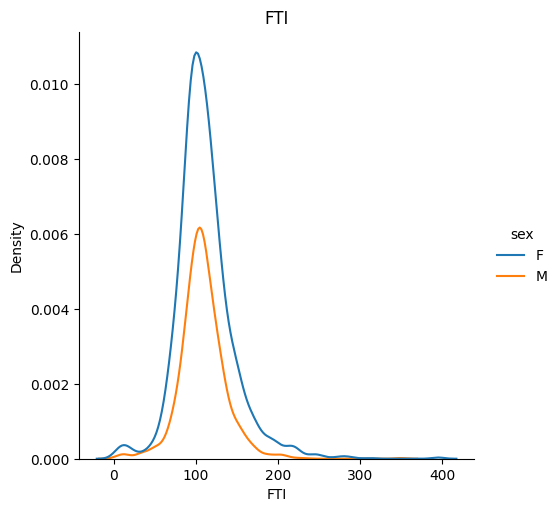

In [35]:
for col in num_columns_names:
    sns.displot(data, x=col, hue='sex', kind='kde')
    plt.title(col)
    plt.show()

Dla konkretnej płci z podziałem na chorych i zdrowych pacjentów:

In [36]:
num_columns_names

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'], dtype='object')

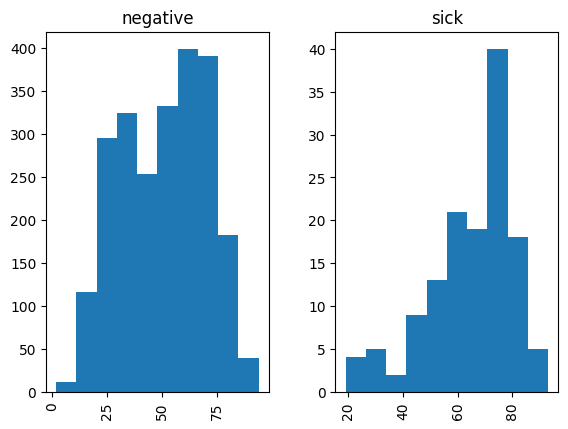

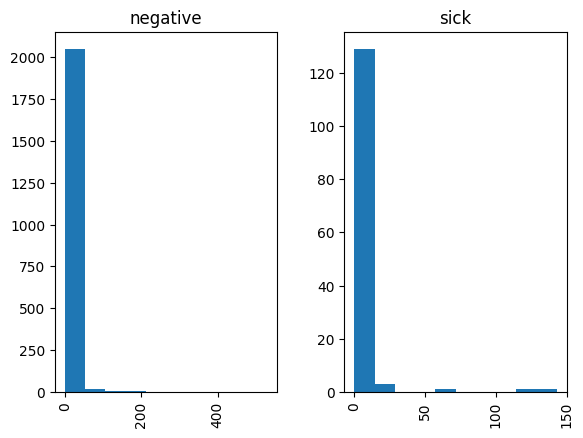

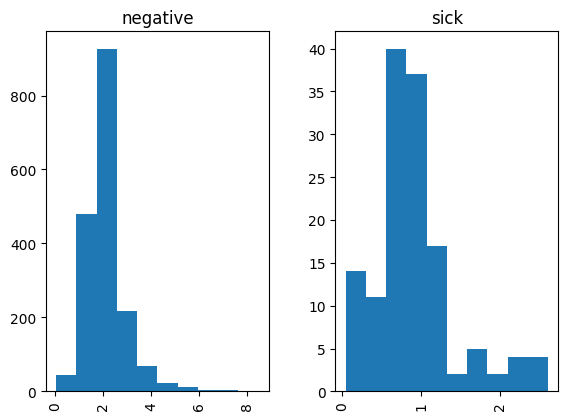

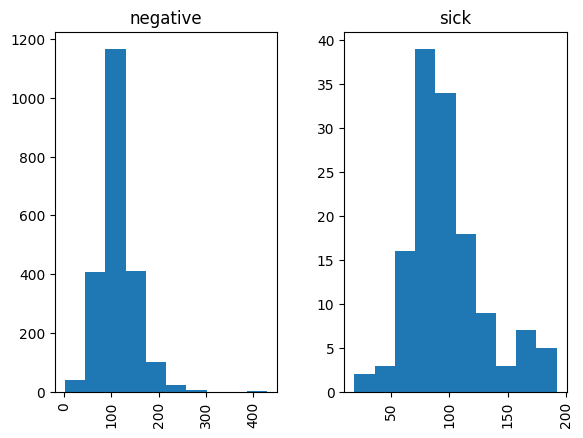

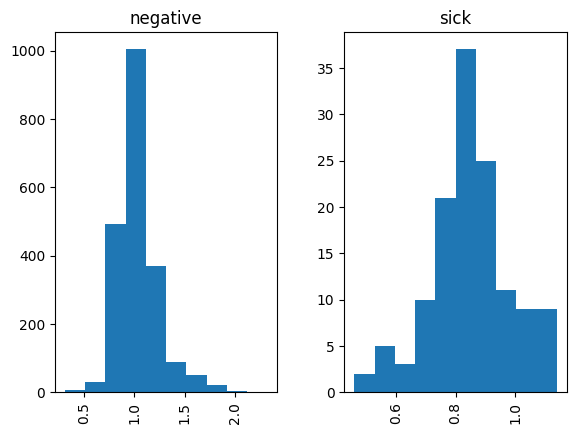

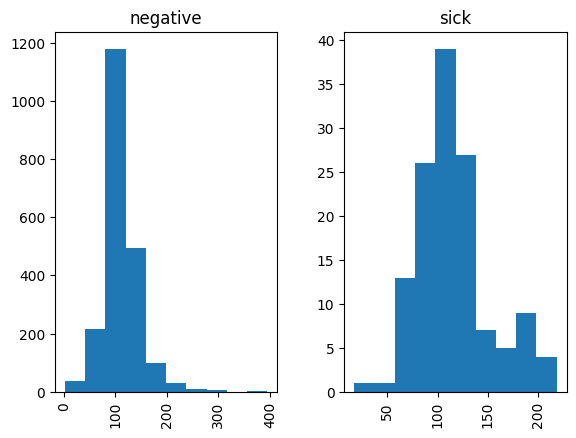

In [37]:
for col in num_columns_names:
    female[col].hist(by=data['Class'])

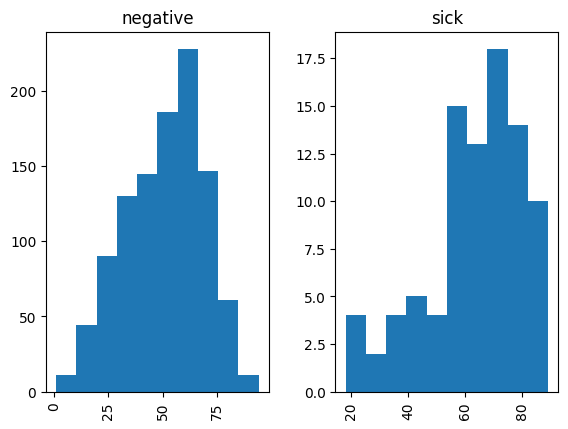

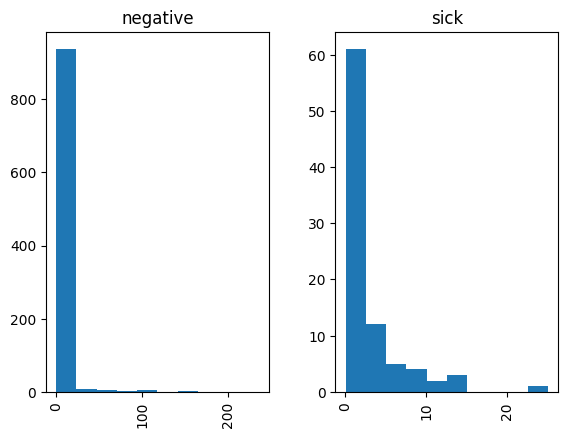

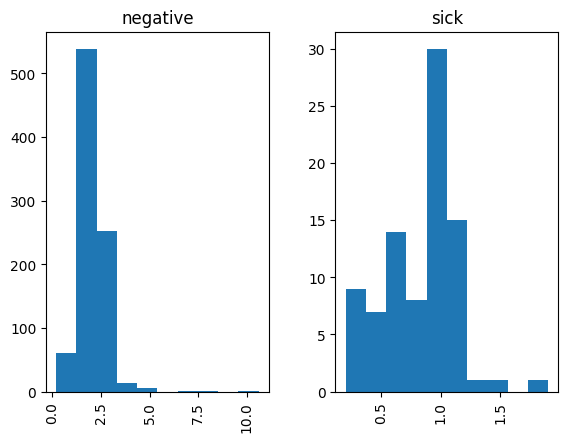

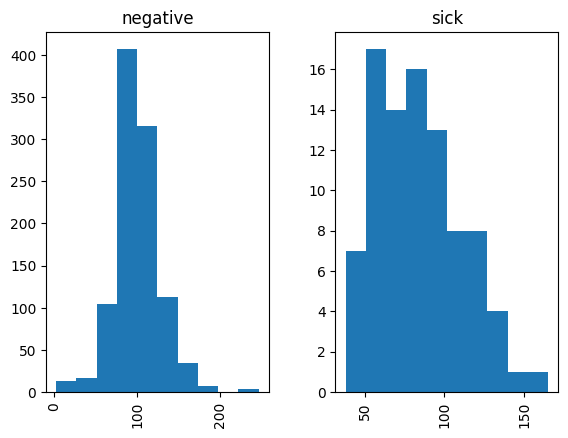

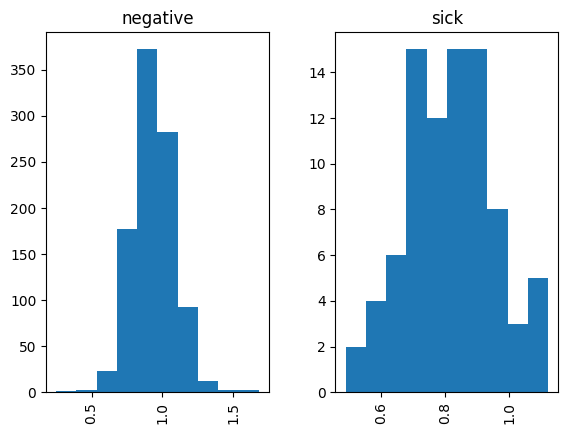

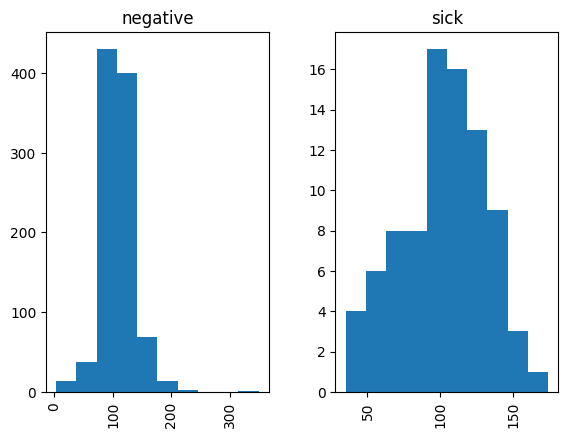

In [38]:
for col in num_columns_names:
    male[col].hist(by=data['Class'])

Statystyki w tabeli z dokładnym podziałem na kobiety zdrowe i chore oraz analogicznie dla mężczyzn:

In [39]:
female[female.Class == 'sick'].describe()

,age,TSH,T3,TT4,T4U,FTI
count,136.000000,135.000000,136.000000,136.000000,132.000000,132.000000
mean,65.169118,5.254889,0.925368,98.183824,0.845833,116.280303
std,15.490764,16.835077,0.506732,32.769499,0.135365,36.166349
min,19.000000,0.005000,0.050000,19.000000,0.460000,17.000000
25%,56.750000,0.330000,0.700000,77.000000,0.770000,93.000000
50%,70.000000,1.600000,0.900000,92.000000,0.850000,109.500000
75%,76.250000,3.600000,1.025000,112.000000,0.910000,131.500000
max,93.000000,143.000000,2.600000,192.000000,1.140000,219.000000


In [40]:
female[female.Class != 'sick'].describe()

,age,TSH,T3,TT4,T4U,FTI
count,2342.000000,2084.000000,1780.000000,2163.000000,2069.000000,2070.000000
mean,50.947054,5.602303,2.138478,113.395978,1.039755,110.875411
std,19.291436,27.268551,0.817275,38.249920,0.204935,34.926924
min,2.000000,0.005000,0.050000,2.000000,0.310000,2.000000
25%,34.000000,0.420000,1.700000,91.000000,0.910000,92.000000
50%,53.000000,1.400000,2.000000,108.000000,1.010000,107.000000
75%,67.000000,2.800000,2.400000,131.000000,1.120000,125.000000
max,94.000000,530.000000,8.500000,430.000000,2.320000,395.000000


In [41]:
male[male.Class == 'sick'].describe()

,age,TSH,T3,TT4,T4U,FTI
count,89.000000,88.000000,86.000000,89.000000,85.000000,85.000000
mean,62.865169,2.870170,0.825581,83.629213,0.818588,102.223529
std,16.897546,4.023292,0.305705,26.628924,0.136984,29.689816
min,18.000000,0.045000,0.200000,38.000000,0.490000,35.000000
25%,55.000000,0.607500,0.625000,62.000000,0.730000,85.000000
50%,66.000000,1.300000,0.900000,82.000000,0.820000,104.000000
75%,75.000000,3.450000,1.000000,101.000000,0.910000,124.000000
max,89.000000,25.000000,1.900000,165.000000,1.120000,174.000000


In [42]:
male[male.Class != 'sick'].describe()

,age,TSH,T3,TT4,T4U,FTI
count,1053.000000,961.000000,873.000000,1015.000000,967.000000,968.000000
mean,50.790123,3.878002,2.036426,100.617044,0.936887,108.841942
std,17.775389,15.497501,0.706086,27.382642,0.145102,27.531627
min,1.000000,0.005000,0.200000,3.000000,0.250000,3.000000
25%,38.000000,0.540000,1.600000,86.000000,0.850000,94.000000
50%,53.000000,1.300000,2.000000,98.000000,0.930000,107.000000
75%,63.000000,2.300000,2.300000,116.000000,1.020000,122.000000
max,94.000000,236.000000,10.600000,246.000000,1.680000,349.000000


#### Korelacje zmiennych numerycznych ze zmienną celu

In [43]:
data2 = data
data2.Class=data.Class.replace('sick', 1, regex=True)
data2.Class=data.Class.replace('negative', 0, regex=True)

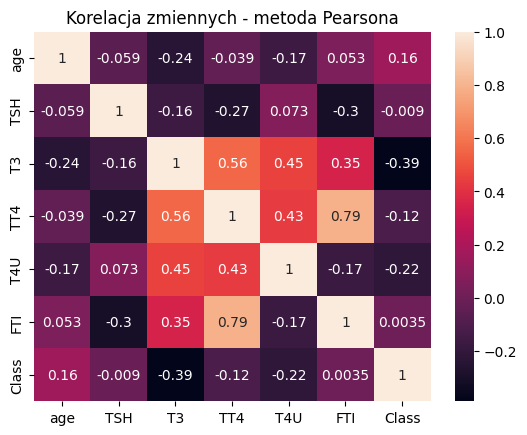

In [44]:
correlation = data[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Class']].corr(method ='pearson')
#Korelacja dla tylko zmiennych ciągłych + target
ax=sns.heatmap(correlation, 
            xticklabels=correlation.columns,
            yticklabels=correlation.columns, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom, top)
ax.set_title('Korelacja zmiennych - metoda Pearsona')
plt.show()

Przykładowe wnioski z wykresu korelacji:
- wysoka korelacja zachodzi między TT4 a FTI, ale wiemy już dlaczego - wskaźnik FTI wylicza się z TT4
- spadek T3 wpływa na niedoczynność tarczycy, w sumie to wszystkie hormony mają ujemną korelację, a wzrost wieku sprzyja chorobom tarczyc
- TT4 i T3 mają dodatnią korelację i to całkiem dużą (ciekawa zależność między nimi a TSH, wszystkie są w jakiejś zależności od siebie - szczegóły w internecie)
- T4U korelacja dodatnia, dość spora z powyższymi
- powyższe dwa punkty, to hormony wytwarzane przez tarczyce, ich zależności mogły być do przewidzenia

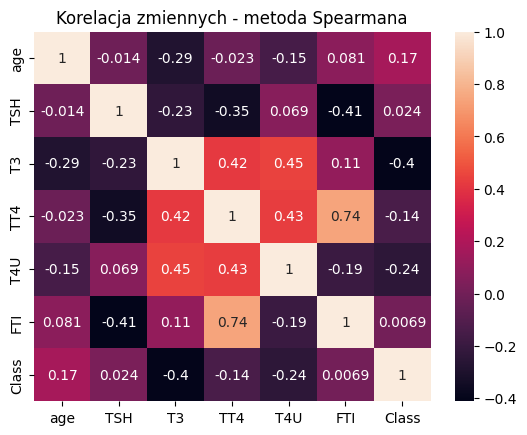

In [45]:
correlation = data[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Class']].corr(method ='spearman')
#Korelacja dla tylko zmiennych ciągłych + target
ax=sns.heatmap(correlation, 
            xticklabels=correlation.columns,
            yticklabels=correlation.columns, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom, top)
ax.set_title('Korelacja zmiennych - metoda Spearmana')
plt.show()

Korelacja między FTI a T3 znacznie się zmieniła.

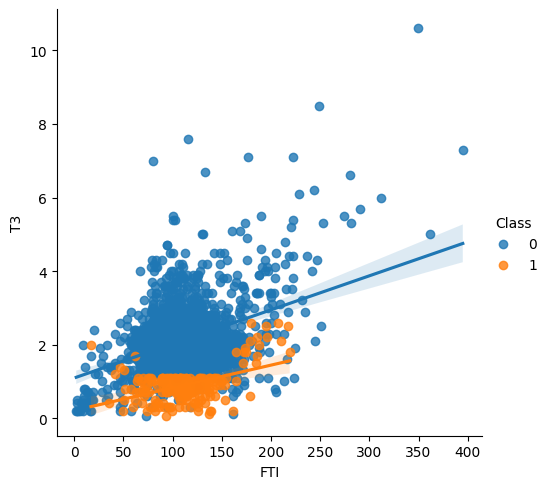

In [75]:
sns.lmplot(x='FTI', y='T3', data=data2, hue='Class')

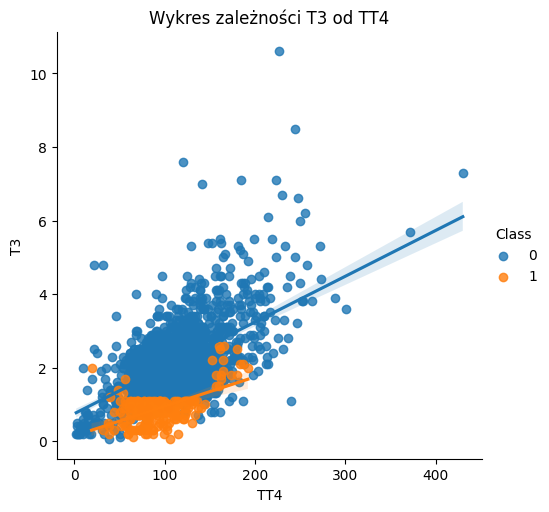

In [84]:
sns.lmplot(x='TT4', y='T3', data=data2, hue='Class')
plt.title('Wykres zależności T3 od TT4')
plt.show()

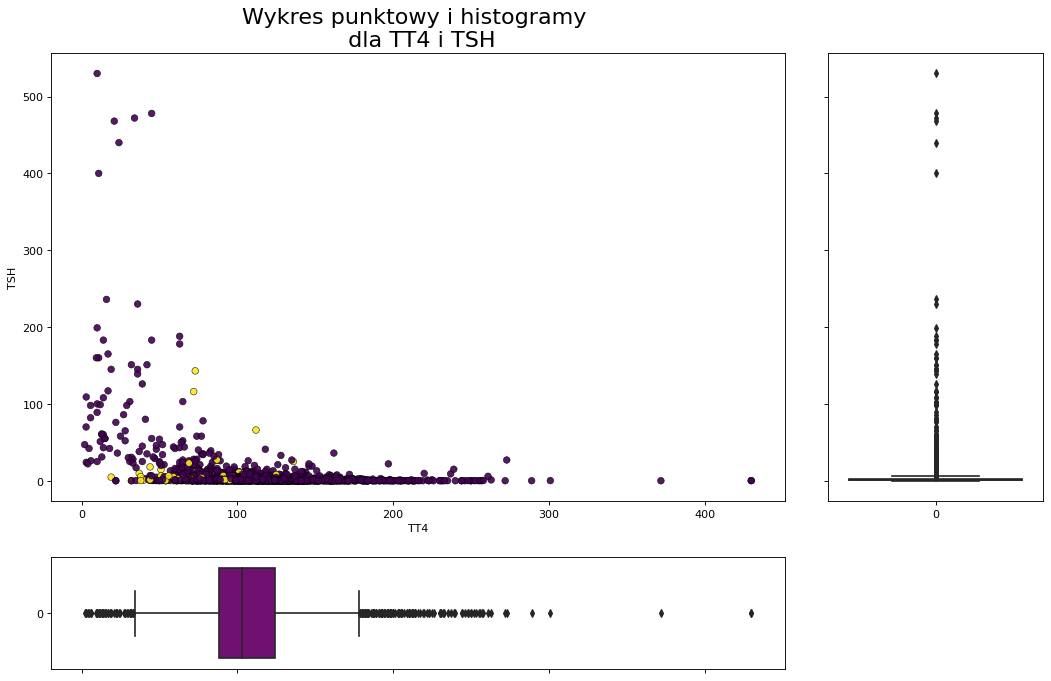

In [47]:
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])
ax_main.scatter('TT4', 'TSH', alpha=.9, data=data2, edgecolors='black', linewidths=.5, c='Class')
sns.boxplot(data2.TSH, ax=ax_right, orient="v", color='purple')
sns.boxplot(data2.TT4, ax=ax_bottom, orient="h", color='purple')
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')
ax_main.set(title='Wykres punktowy i histogramy \n dla TT4 i TSH', xlabel='TT4', ylabel='TSH')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(10)
plt.show()

#### Wykresy skrzynkowe

<AxesSubplot: >

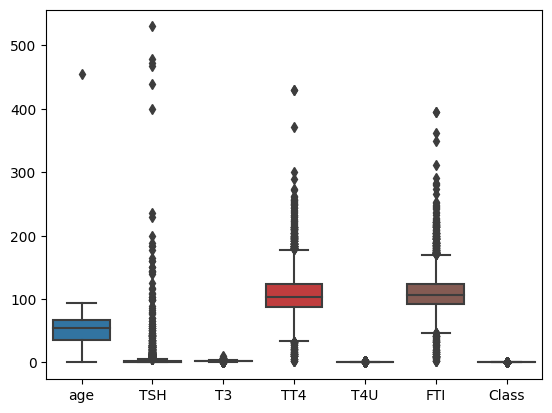

In [48]:
sns.boxplot(data)

<AxesSubplot: >

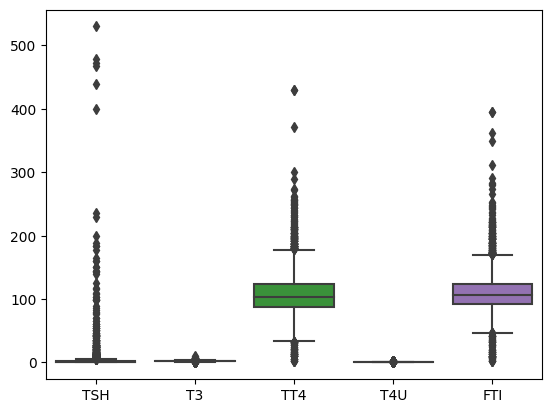

In [76]:
sns.boxplot(data.drop(['age', 'Class'], axis=1))

Nieczytelne wykresy, bo wszystkie kolumny mają inne zakresy wartości, które nie są porównywalne między sobą (nawet gdy rozważamy hormony to wartości nie muszą być w tych samych jednostkach).

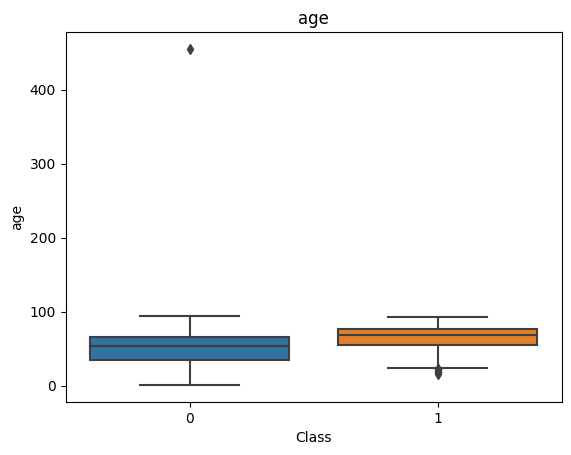

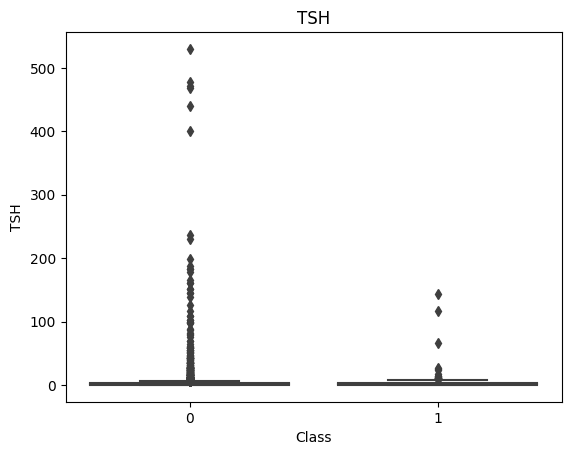

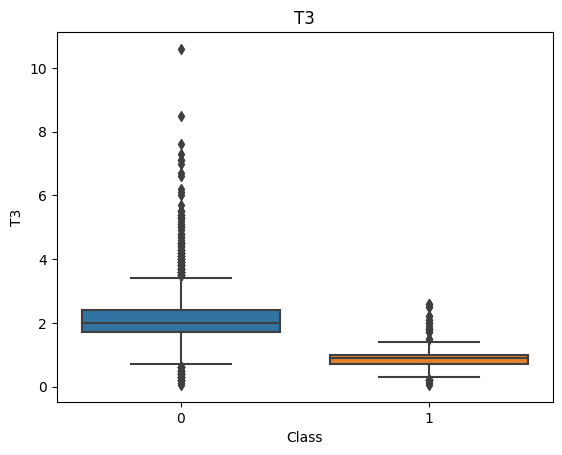

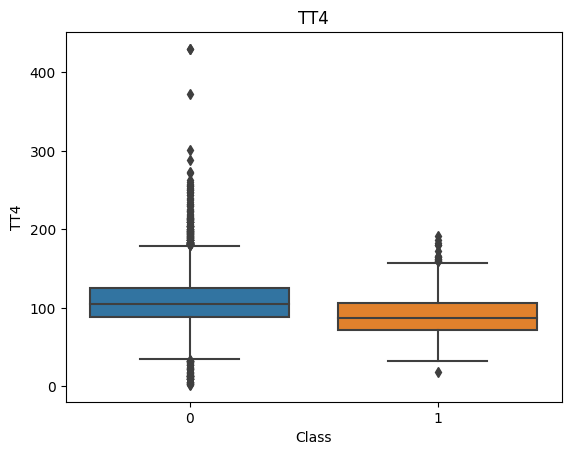

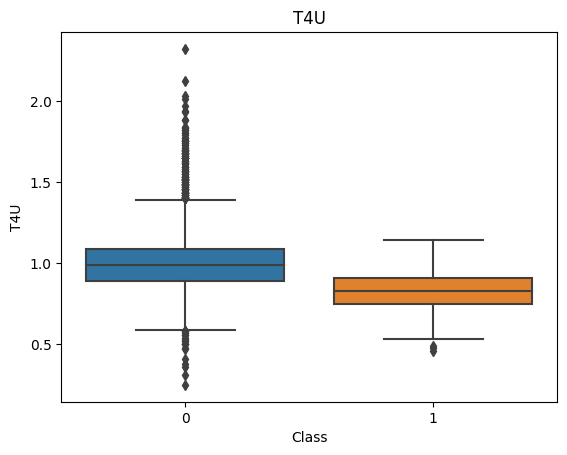

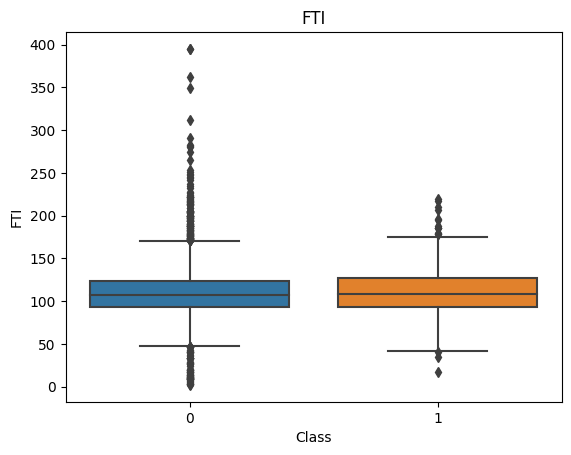

In [49]:
for col in num_columns_names:
    col_plot = sns.boxplot(x = 'Class', y = col, data=data)
    col_plot.set_title(col)
    plt.show()

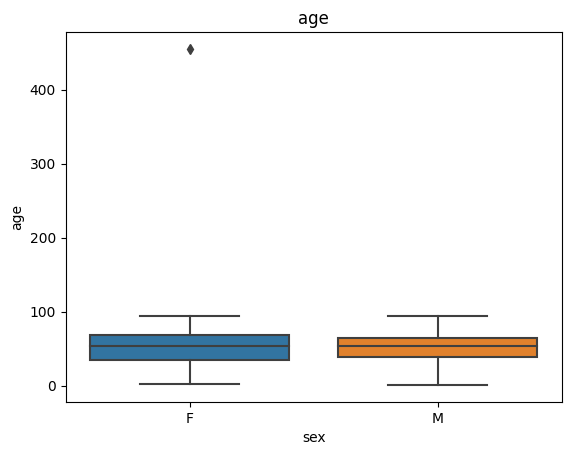

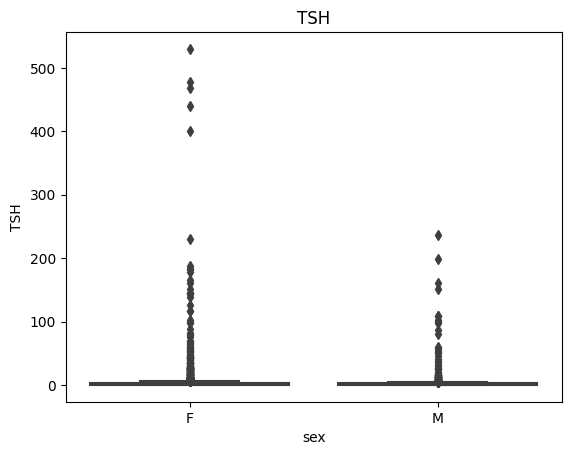

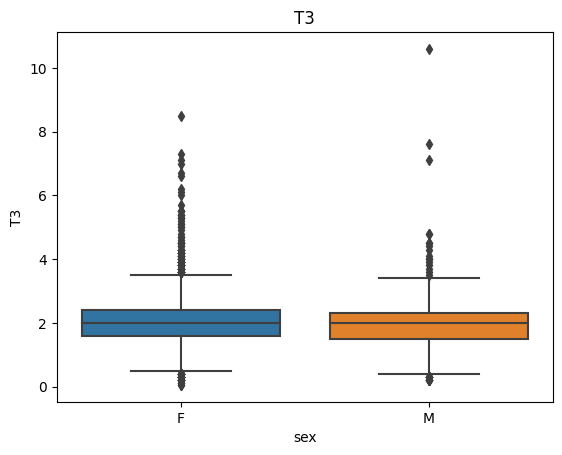

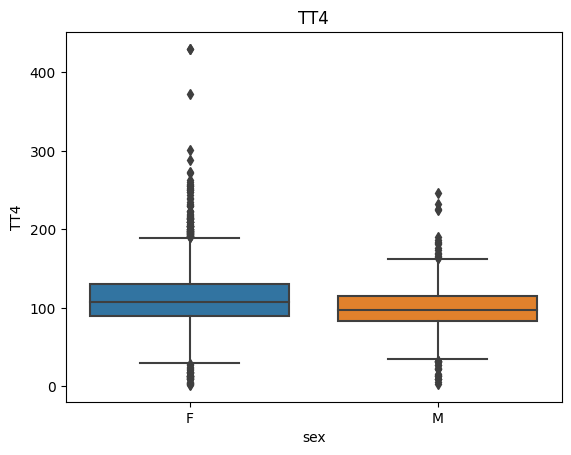

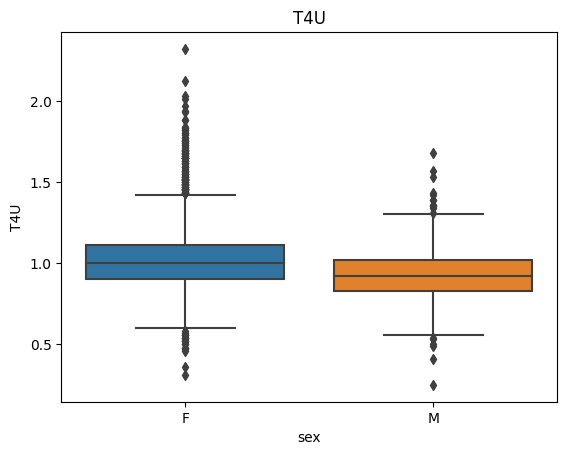

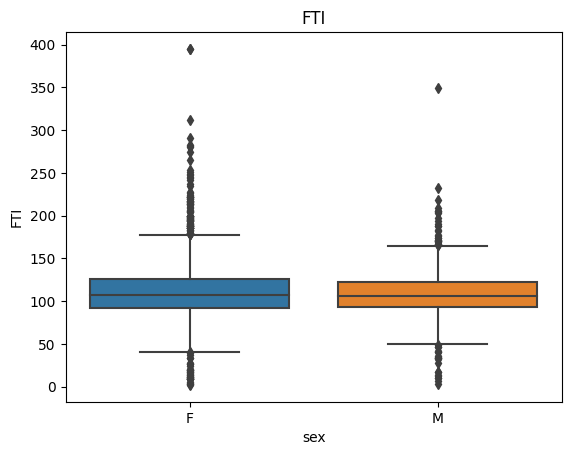

In [50]:
for col in num_columns_names:
    col_plot = sns.boxplot(x = 'sex', y = col, data=data)
    col_plot.set_title(col)
    plt.show()

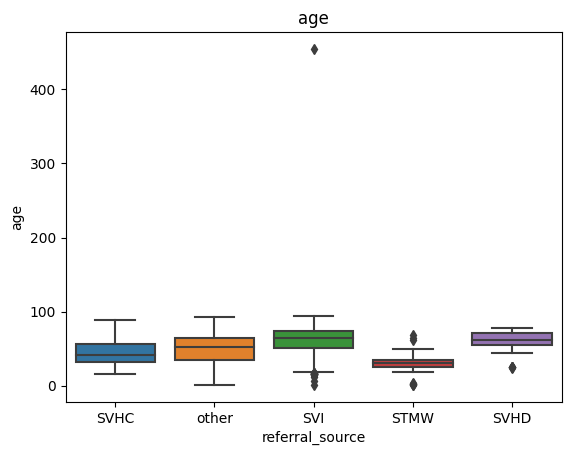

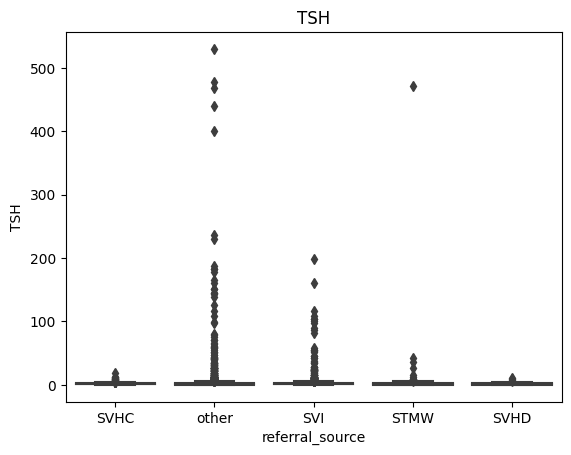

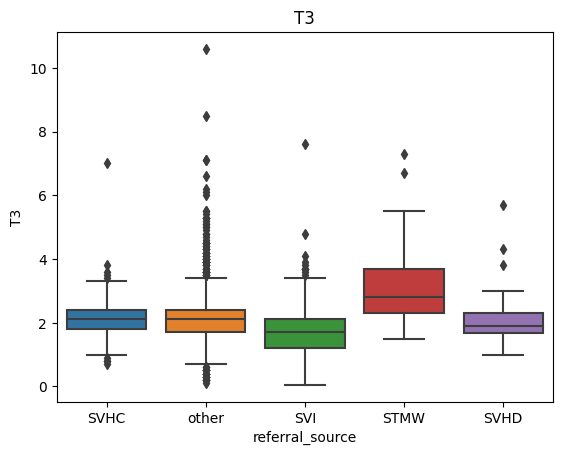

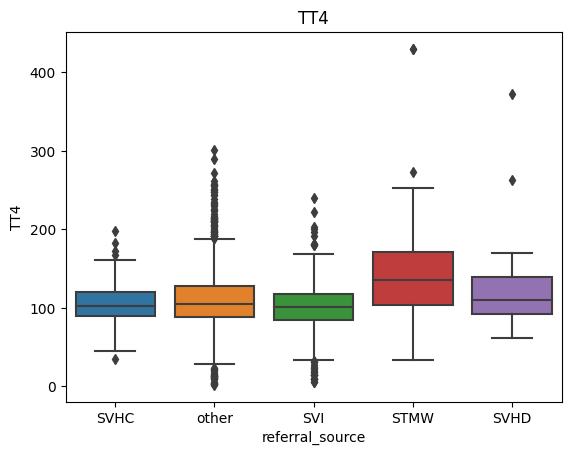

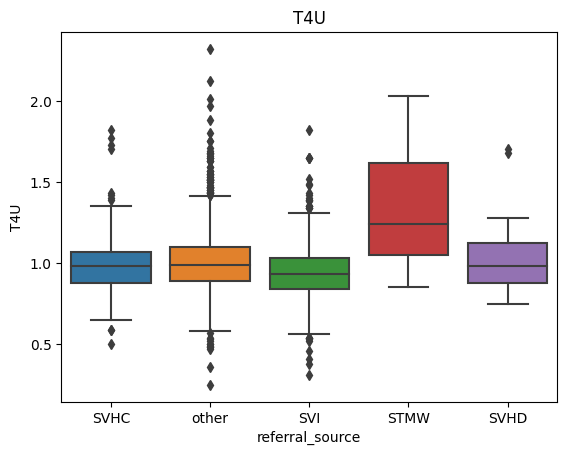

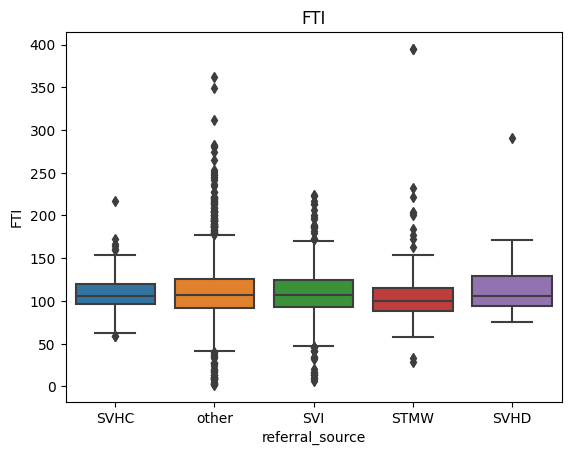

In [51]:
for col in num_columns_names:
    col_plot = sns.boxplot(x = 'referral_source', y = col, data=data)
    col_plot.set_title(col)
    plt.show()

#### Obserwacje odstające

Rozważamy jednynie zmienne numeryczne.

In [52]:
data[num_columns_names].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     3771 non-null   float64
 1   TSH     3403 non-null   float64
 2   T3      3003 non-null   float64
 3   TT4     3541 non-null   float64
 4   T4U     3385 non-null   float64
 5   FTI     3387 non-null   float64
dtypes: float64(6)
memory usage: 176.9 KB


In [53]:
import scipy.stats as sp
from scipy.special import erfc

def Chauvenet(datapoints):

    numdatapoints = len(datapoints) # len of array
    
    #calculcate normalized distance to mean 
    #Attention: numpy.std uses the division by (N-ddof), where by default ddof = 0. In R it is N-1)
    dist = abs(datapoints - np.mean(datapoints))/np.std(datapoints, ddof = 1)
    
    prob = numdatapoints * sp.norm.pdf(dist, 0, 1) # area under normal dist
    
    #select only those point 
    sel = datapoints[np.where(prob >= 0.5)]   
    print(prob)
    
    return sel

# to samo, ale chcemy znać te co odrzucono, więc zmieniamy funkcję, aby zwraca te wyrzucone wartości
def Chauvenet2(datapoints):

    numdatapoints = len(datapoints)
    dist = abs(datapoints - np.mean(datapoints))/np.std(datapoints, ddof = 1)
    prob = numdatapoints * sp.norm.pdf(dist, 0, 1)
    sel = datapoints[np.where(prob < 0.5)]

    return sel

In [54]:
# tylko odrzucone wartości
# UWAGA - należy usunąć braki danych, więc nie biorą one udziału w liczeniu kryterium!!!
for col in num_columns_names:
    print('\n'+col+'\n')
    df_chauvenet2 = Chauvenet2(np.array(df[col][~np.isnan(df[col])]))
    print(df_chauvenet2)
    print('________________________________________________________________________________')


age

[455.]
________________________________________________________________________________

TSH

[160. 151. 143. 108. 199. 188. 103. 478. 183. 151. 103. 126. 178. 145.
 472. 116. 183. 468. 165. 160. 145. 236. 440. 139. 530. 109. 400. 230.
 117.]
________________________________________________________________________________

T3

[ 5.5  5.5  5.4  6.   5.3  7.3  6.7  5.3  6.1 10.6  7.   5.3  6.2  5.5
  7.1  5.4  8.5  7.6  5.7  5.4  6.6  7.1  5.3]
________________________________________________________________________________

TT4

[257. 272. 430. 430. 255. 289. 252. 263. 301. 253. 261. 256. 273. 372.
 258.]
________________________________________________________________________________

T4U

[1.83 1.93 1.82 1.97 2.03 1.84 1.79 1.8  1.94 2.12 1.8  1.88 1.88 2.32
 1.82 1.83 2.01]
________________________________________________________________________________

FTI

[274. 362. 312. 281. 251. 395. 395. 349. 253. 244. 247. 265. 283. 249.
 291. 245. 280.]
________________________________

Oczywiście, zastosowane kryterium odrzuciło anomalię w postaci wieku równego 455. Przy innych wartościach hormonów również pojawiły się wartości uznane za odstające. Z punktu medycznego, osiągnięcie takich danych jest wykonalne, więc można założyć, że usunięcie wartości odstających dla hormonów nie będzie najlepszym rozwiązaniem, gdyż te anomalie mogą być powodem choroby - w medycynie wszystko jest możliwe, a skoro są to osiągalne wyniki to lepiej je zostawić.